 # <center><font color='red'><b>CUSTOMER CHURN PREDICTION</b></font></center>

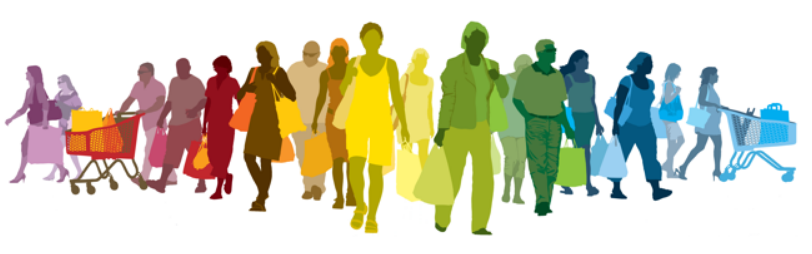

# Table of Contents

1. [Problem Statement](#problem_statement)
2. [Data Dictionary](#data_dictionary)
3. [Import Libraries](#import_libraries)
4. [Exploratory Data Analysis](#eda)
    1. [Data Cleaning](#data_cleaning)
    2. [Descriptive Statistics](#descriptive_statistics)
    3. [Univariate Analysis](#univariate_analysis)
    4. [Bivariate and Multivariate Analysis](#bivariate_multivariate_analysis)
    5. [Missing Value Treatment](#missing_value_treatment)
    6. [Outliers Analysis](#outliers_analysis)
    7. [Data Scaling and Transformation](#data_scaling_transformation)
    8. [Train and Test Split](#train_test_split)
5. [Model Building](#model_building)
    1. [Logistic Regression](#logistic_regression)
    2. [Decision Tree](#decision_tree)
    3. [Random Forest](#random_forest)
    4. [AdaBoostClassifier](#adaboost_classifier)
    5. [GradientBoostingClassifier](#gradient_boosting_classifier)
    6. [XGBoost](#xgboost)
6. [Displaying Score Summary](#score_summary)
7. [Conclusion](#conclusion)

# 1. Problem Statement <a id="problem_statement"></a>

##### Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Understanding and detecting churn is the first step to retaining these customers and improving the company’s offerings.

##### Goal is to predict the churn for a website based on the features provided in the dataset. Customer will EXIT(1) or NOT(0), and identify customers who are likely to leave so that we can retain then with some special offers on membership.

# 2. Data Dictionary <a id="data_dictionary"></a>

**age** : Represents the age of a customer

**gender** : Represents the gender of a customer

**security_no** : Represents a unique security number that is used to identify a person

**region_category** : Represents the region that a customer belongs to

**membership_category** : Represents the category of the membership that a customer is using

**joining_date** : Represents the date when a customer became a member

**joined_through_referral** : Represents whether a customer joined using any referral code or ID

**referral_id** : Represents a referral ID

**preferred_offer_types** : Represents the type of offer that a customer prefers

**medium_of_operation** : Represents the medium of operation that a customer uses for transactions

**internet_option** : Represents the type of internet service a customer uses

**last_visit_time** : Represents the last time a customer visited the website

**days_since_last_login** : Represents the no. of days since a customer last logged into the website

**avg_time_spent** : Represents the average time spent by a customer on the website

**avg_transaction_value** : Represents the average transaction value of a customer

**avg_frequency_login_days** : Represents the no. of times a customer has logged in to the website

**points_in_wallet** : Represents the points awarded to a customer on each transaction

**used_special_discount** : Represents whether a customer uses special discounts offered

**offer_application_preference** : Represents whether a customer prefers offers

**past_complaint** : Represents whether a customer has raised any complaints

**complaint_status** : Represents whether the complaints raised by a customer were resolved

**feedback** : Represents the feedback provided by a customer

**churn_risk_score** : 0 or 1 [Customer will Stay or Exit]

# 3. Import Libraries <a id="import_libraries"></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot  as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
LabelEncoder = LabelEncoder()
standard_scale = StandardScaler()

In [3]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score,accuracy_score
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.model_selection import LeaveOneOut 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold

In [5]:
df = pd.read_csv("churn.csv")

# 4. Exploratory Data Analysis <a id="eda"></a>

In [6]:
df

Unnamed: 0  age gender security_no region_category  \
0               0   18      F     XW0DQ7H         Village   
1               1   32      F     5K0N3X1            City   
2               2   44      F     1F2TCL3            Town   
3               3   37      M     VJGJ33N            City   
4               4   31      F     SVZXCWB            City   
...           ...  ...    ...         ...             ...   
36987       36987   46      F     6F51HFO             NaN   
36988       36988   29      F     21KSM8Y            Town   
36989       36989   23      F     XK1IM9H             NaN   
36990       36990   53      M     K6VTP1Z         Village   
36991       36991   35      M     LBX0GLR            Town   

       membership_category joining_date joined_through_referral referral_id  \
0      Platinum Membership   2017-08-17                      No    xxxxxxxx   
1       Premium Membership   2017-08-28                       ?    CID21329   
2            No Membership   2016-11-11                     Yes    CID12313   
3            No Membership   2016-10-29                     Yes     CID3793   
4            No Membership   2017-09-12                      No    xxxxxxxx   
...                    ...          ...                     ...         ...   
36987     Basic Membership   2017-09-21                      No    xxxxxxxx   
36988     Basic Membership   2016-06-27                      No    xxxxxxxx   
36989     Basic Membership   2016-09-11                     Yes     CID3838   
36990  Platinum Membership   2017-06-15                      No    xxxxxxxx   
36991    Silver Membership   2015-10-23                      No    xxxxxxxx   

          preferred_offer_types  ... avg_time_spent avg_transaction_value  \
0         Gift Vouchers/Coupons  ...     300.630000              53005.25   
1         Gift Vouchers/Coupons  ...     306.340000              12838.38   
2         Gift Vouchers/Coupons  ...     516.160000              21027.00   
3         Gift Vouchers/Coupons  ...      53.270000              25239.56   
4      Credit/Debit Card Offers  ...     113.130000              24483.66   
...                         ...  ...            ...                   ...   
36987  Credit/Debit Card Offers  ...    -650.682759              27277.68   
36988            Without Offers  ...    -638.123421              11069.71   
36989     Gift Vouchers/Coupons  ...     154.940000              38127.56   
36990     Gift Vouchers/Coupons  ...     482.610000               2378.86   
36991     Gift Vouchers/Coupons  ...      79.180000               2189.68   

      avg_frequency_login_days  points_in_wallet  used_special_discount  \
0                         17.0        781.750000                    Yes   
1                         10.0               NaN                    Yes   
2                         22.0        500.690000                     No   
3                          6.0        567.660000                     No   
4                         16.0        663.060000                     No   
...                        ...               ...                    ...   
36987                      6.0        639.510000                     No   
36988                     28.0        527.990000                    Yes   
36989                    Error        680.470000                     No   
36990                     20.0        197.264414                    Yes   
36991                    Error        719.970000                    Yes   

       offer_application_preference past_complaint          complaint_status  \
0                               Yes             No            Not Applicable   
1                                No            Yes                    Solved   
2                               Yes            Yes       Solved in Follow-up   
3                               Yes            Yes                  Unsolved   
4                               Yes            Yes                    Solved   
...                

In [7]:
df.shape

(36992, 24)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    36992 non-null  int64  
 1   age                           36992 non-null  int64  
 2   gender                        36992 non-null  object 
 3   security_no                   36992 non-null  object 
 4   region_category               31564 non-null  object 
 5   membership_category           36992 non-null  object 
 6   joining_date                  36992 non-null  object 
 7   joined_through_referral       36992 non-null  object 
 8   referral_id                   36992 non-null  object 
 9   preferred_offer_types         36704 non-null  object 
 10  medium_of_operation           36992 non-null  object 
 11  internet_option               36992 non-null  object 
 12  last_visit_time               36992 non-null  object 
 13  d

In [9]:
df.isnull().sum()

Unnamed: 0                         0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

# 4.1 Data Cleaning <a id="data_cleaning"></a>

In [10]:
df.duplicated().sum()

0

##### There is no duplication in dataset.

In [11]:
df.drop(['Unnamed: 0','security_no',"joining_date",'referral_id','last_visit_time'],axis=1, inplace=True)

##### Dropped features such as 'Unnamed: 0','security_no',referral_id,etc. because either they aren't valuable for predicting churn or having major missing values.

In [12]:
df['gender'] = df['gender'].replace('Unknown',np.NaN)

In [13]:
df['joined_through_referral'] = df['joined_through_referral'].replace('?',np.NaN)

In [14]:
df['medium_of_operation'] = df['medium_of_operation'].replace('?',np.NaN)

In [15]:
df["avg_time_spent"] = df["avg_time_spent"].replace("-",np.NaN)

In [16]:
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].replace('Error',np.NaN)
df["avg_frequency_login_days"] = df["avg_frequency_login_days"].replace("-",np.NaN)

In [17]:
df["points_in_wallet"] = df["points_in_wallet"].replace("-",np.NaN)

In [18]:
df["avg_frequency_login_days"] = df["avg_frequency_login_days"].astype(str).str.replace("-","")
df["avg_time_spent"] = df["avg_time_spent"].astype(str).str.replace("-","")
df["points_in_wallet"] = df["points_in_wallet"].astype(str).str.replace("-","")
df["days_since_last_login"] = df["days_since_last_login"].astype(str).str.replace("-","")

In [19]:
for i in ['avg_time_spent','avg_frequency_login_days','points_in_wallet','days_since_last_login'] :
    df[i] = pd.to_numeric(df[i],errors='coerce')

#####  changed data type for  avg_time_spent ,avg_frequency_login_days,days_since_last_login and points_in_wallet

# 4.2 Descriptive Statistics <a id="descriptive_statistics"></a>

In [20]:
df_num = df.select_dtypes(exclude='object')
df_cat = df.select_dtypes(include='object')

In [21]:
df_num.std()

age                            15.867412
days_since_last_login         223.052217
avg_time_spent                344.671872
avg_transaction_value       19444.806226
avg_frequency_login_days        8.389817
points_in_wallet              189.227731
churn_risk_score                0.498324
dtype: float64

##### Remove Variables with Low Standard Deviation

In [22]:
df.describe().T

count          mean           std         min  \
age                       36992.0     37.118161     15.867412   10.000000   
days_since_last_login     36992.0     66.053768    223.052217    1.000000   
avg_time_spent            36992.0    314.822566    344.671872    1.837399   
avg_transaction_value     36992.0  29271.194003  19444.806226  800.460000   
avg_frequency_login_days  33470.0     16.425529      8.389817    0.006221   
points_in_wallet          33549.0    688.230089    189.227731    0.788907   
churn_risk_score          36992.0      0.540982      0.498324    0.000000   

                                 25%        50%        75%           max  
age                          23.0000     37.000     51.000     64.000000  
days_since_last_login         9.0000     13.000     18.000    999.000000  
avg_time_spent               75.4275    186.175    416.155   3235.578521  
avg_transaction_value     14177.5400  27554.485  40855.110  99914.050000  
avg_frequency_login_days     10.0000     16.000     23.000     73.061995  
points_in_wallet            616.1700    697.630    763.950   2069.069761  
churn_risk_score              0.0000      1.000      1.000      1.000000

##### 1.Average age of customers who is likely to exit is 37

##### 2.On average customers have around 688 point in wallet

##### 3.MIN no. of days since a customer logged in is 1

In [23]:
df.describe(include=object).T

count unique                    top   freq
gender                        36933      2                      F  18490
region_category               31564      3                   Town  14128
membership_category           36992      6       Basic Membership   7724
joined_through_referral       31554      2                     No  15839
preferred_offer_types         36704      3  Gift Vouchers/Coupons  12349
medium_of_operation           31599      3                Desktop  13913
internet_option               36992      3                  Wi-Fi  12413
used_special_discount         36992      2                    Yes  20342
offer_application_preference  36992      2                    Yes  20440
past_complaint                36992      2                     No  18602
complaint_status              36992      5         Not Applicable  18602
feedback                      36992      9   Poor Product Quality   6350

##### 1. Mostly customers are Females belongs to Town

##### 2. Most customers uses Desktop to access website over wi-fi

##### 3. Most of the customers have Basic Membership of the service

In [24]:
df_num.head()

age  days_since_last_login  avg_time_spent  avg_transaction_value  \
0   18                     17          300.63               53005.25   
1   32                     16          306.34               12838.38   
2   44                     14          516.16               21027.00   
3   37                     11           53.27               25239.56   
4   31                     20          113.13               24483.66   

   avg_frequency_login_days  points_in_wallet  churn_risk_score  
0                      17.0            781.75                 0  
1                      10.0               NaN                 0  
2                      22.0            500.69                 1  
3                       6.0            567.66                 1  
4                      16.0            663.06                 1

In [25]:
df_cat.head()

gender region_category  membership_category joined_through_referral  \
0      F         Village  Platinum Membership                      No   
1      F            City   Premium Membership                     NaN   
2      F            Town        No Membership                     Yes   
3      M            City        No Membership                     Yes   
4      F            City        No Membership                      No   

      preferred_offer_types medium_of_operation internet_option  \
0     Gift Vouchers/Coupons                 NaN           Wi-Fi   
1     Gift Vouchers/Coupons             Desktop     Mobile_Data   
2     Gift Vouchers/Coupons             Desktop           Wi-Fi   
3     Gift Vouchers/Coupons             Desktop     Mobile_Data   
4  Credit/Debit Card Offers          Smartphone     Mobile_Data   

  used_special_discount offer_application_preference past_complaint  \
0                   Yes                          Yes             No   
1                   Yes                           No            Yes   
2                    No                          Yes            Yes   
3                    No                          Yes            Yes   
4                    No                          Yes            Yes   

      complaint_status                  feedback  
0       Not Applicable  Products always in Stock  
1               Solved     Quality Customer Care  
2  Solved in Follow-up              Poor Website  
3             Unsolved              Poor Website  
4               Solved              Poor Website

##### There are 12 categorical variables and 7 numerical variables.

# 4.3 Univariate Analysis <a id="univariate_analysis"></a>

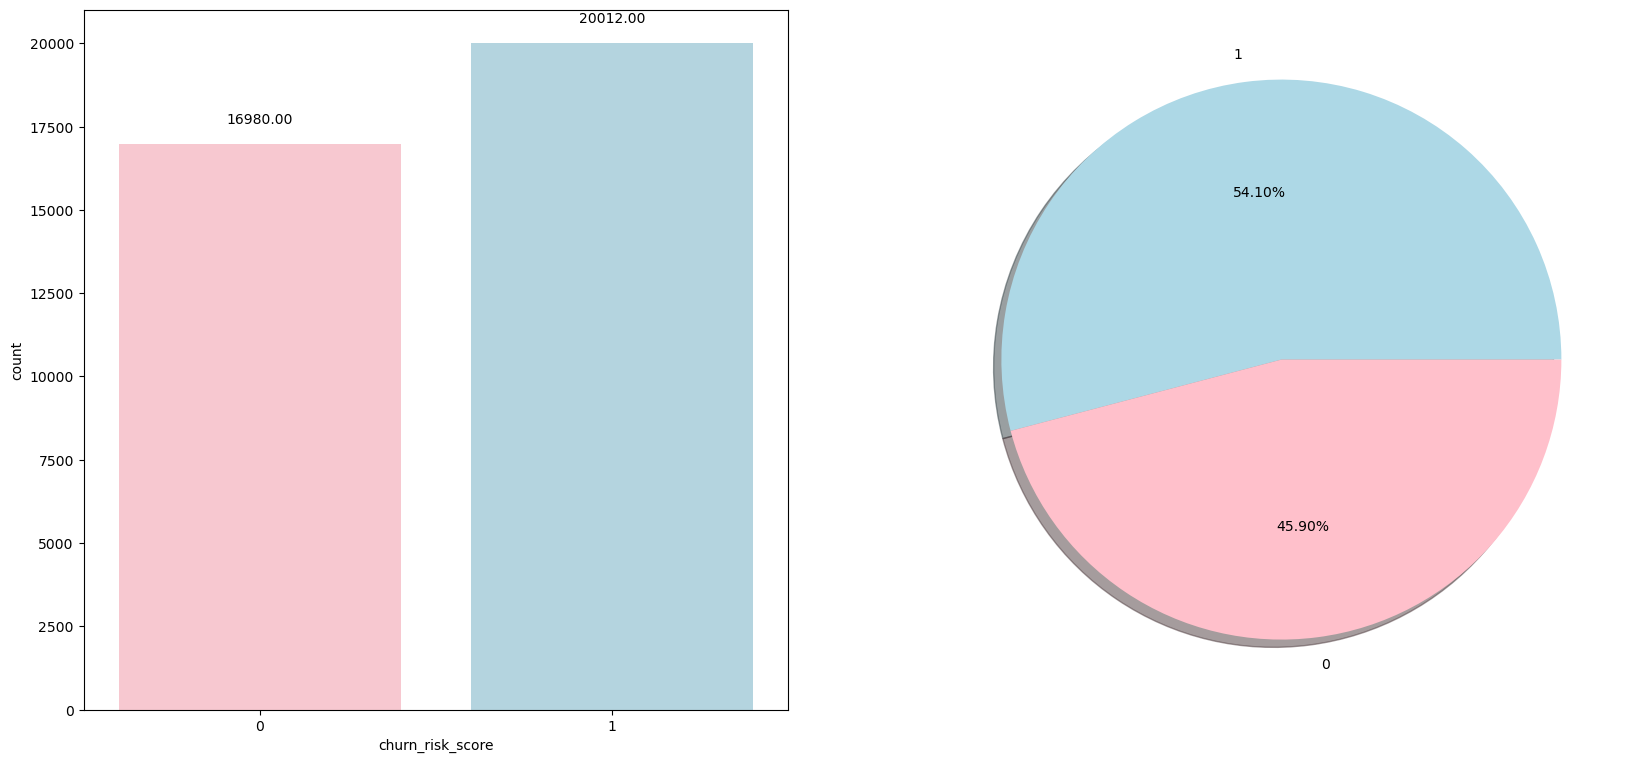

In [26]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
ax = sns.countplot(x='churn_risk_score',data=df,palette=['pink','lightblue'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2. , p.get_height()), ha = 'center',
           xytext = (0, 15), textcoords = 'offset points')
plt.subplot(2,2,2)
Values  = df["churn_risk_score"].value_counts().values
Lables  = df["churn_risk_score"].value_counts().index
plt.pie(Values,labels=Lables,autopct='%.2f%%',shadow=True,colors=["lightblue",'pink'])
plt.show() 

##### Target feature churn_risk_score's classes Custimer will Exit (1) and Customer wont exit (0) are kind of equally distributed by 5:4 ratio.

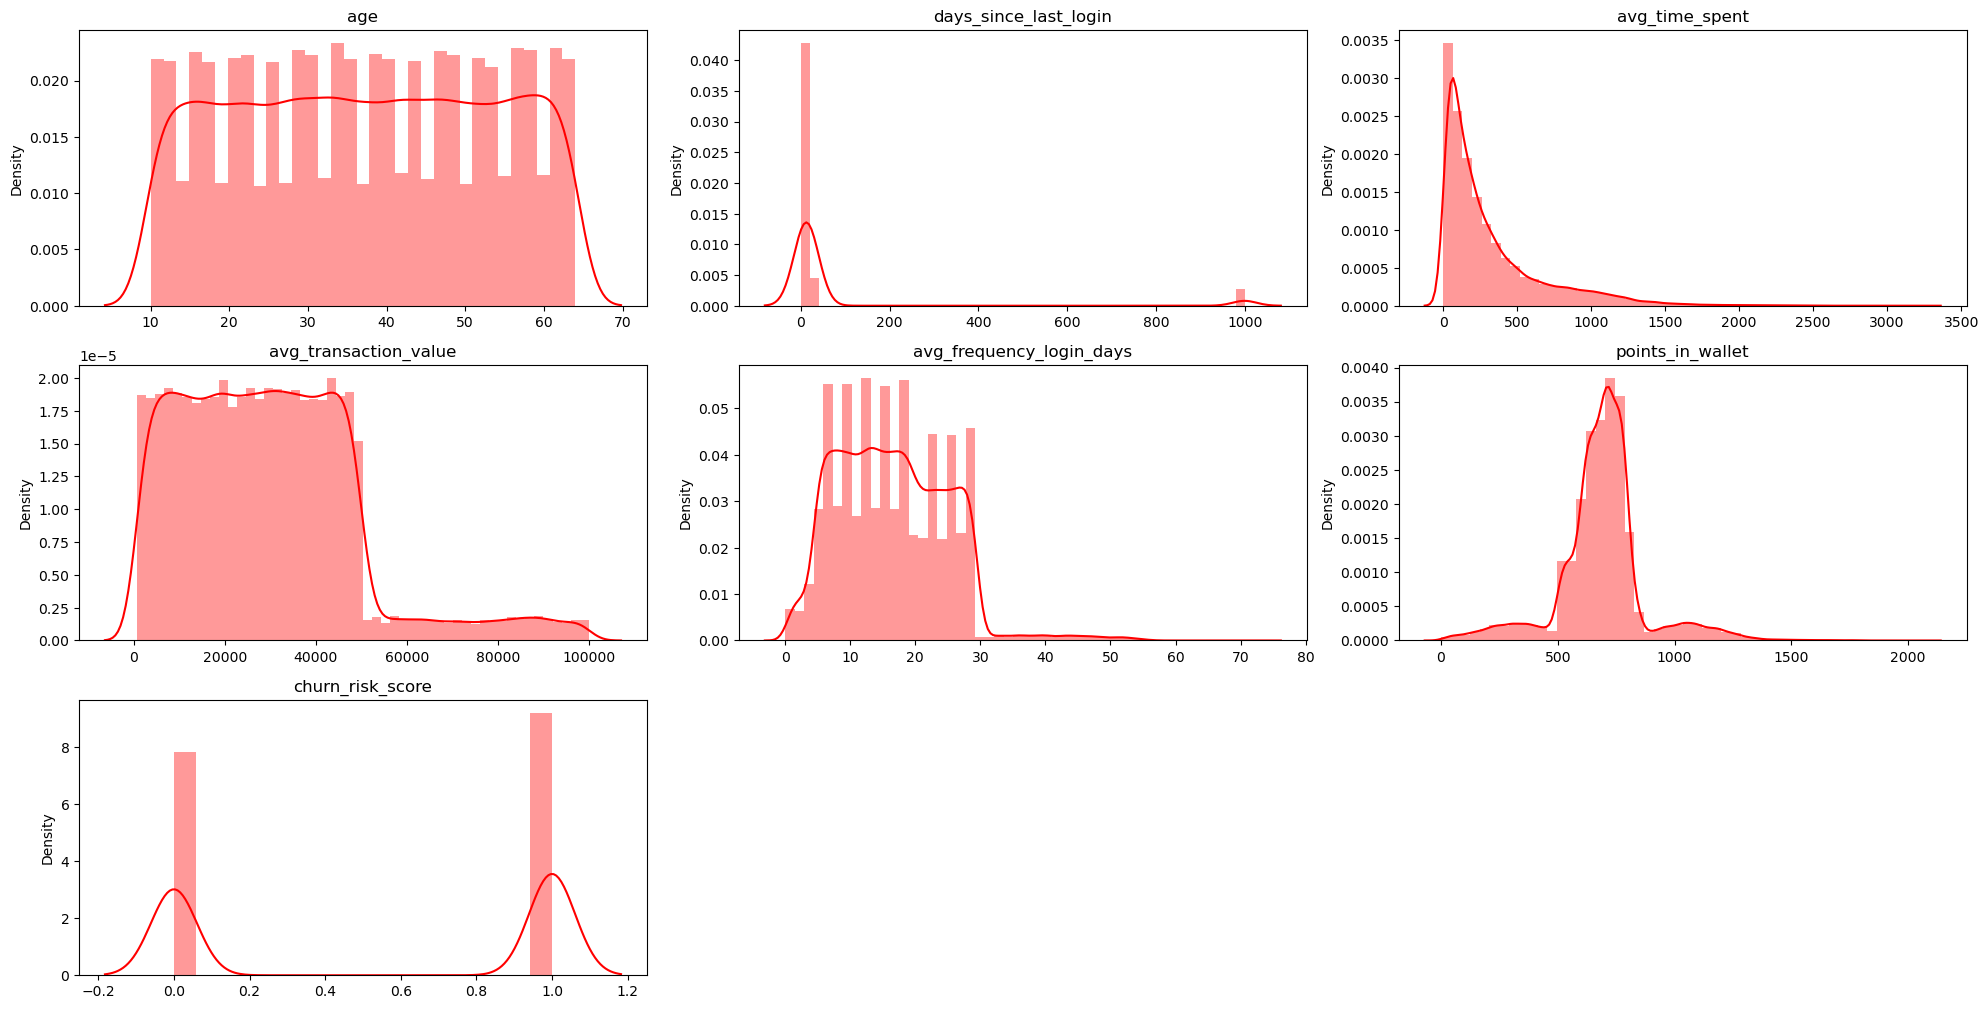

In [27]:
columns_to_plot = df_num.columns
plt.figure(figsize=(20,20))
for i,col_name in enumerate(columns_to_plot,1):
    plt.subplot(6,3,i)
    sns.distplot(x=df_num[col_name],color='red')
    plt.title(col_name)
plt.tight_layout()
plt.show()

In [28]:
df_num.skew()

age                        -0.007319
days_since_last_login       3.941162
avg_time_spent              1.992459
avg_transaction_value       1.011027
avg_frequency_login_days    0.638976
points_in_wallet            0.195460
churn_risk_score           -0.164487
dtype: float64

##### The skewness value of -0.007319 suggests a nearly symmetric distribution for the 'age' feature. 

##### As we can see from plot independent feature days_since_last_login is highly left skewed

##### avg_time_spent ,avg_transaction_value ,avg_frequency_login_days are moderately skewed distribution

##### The skewness value of -0.164487 suggests a nearly symmetric distribution for the 'churn_risk_score' feature.

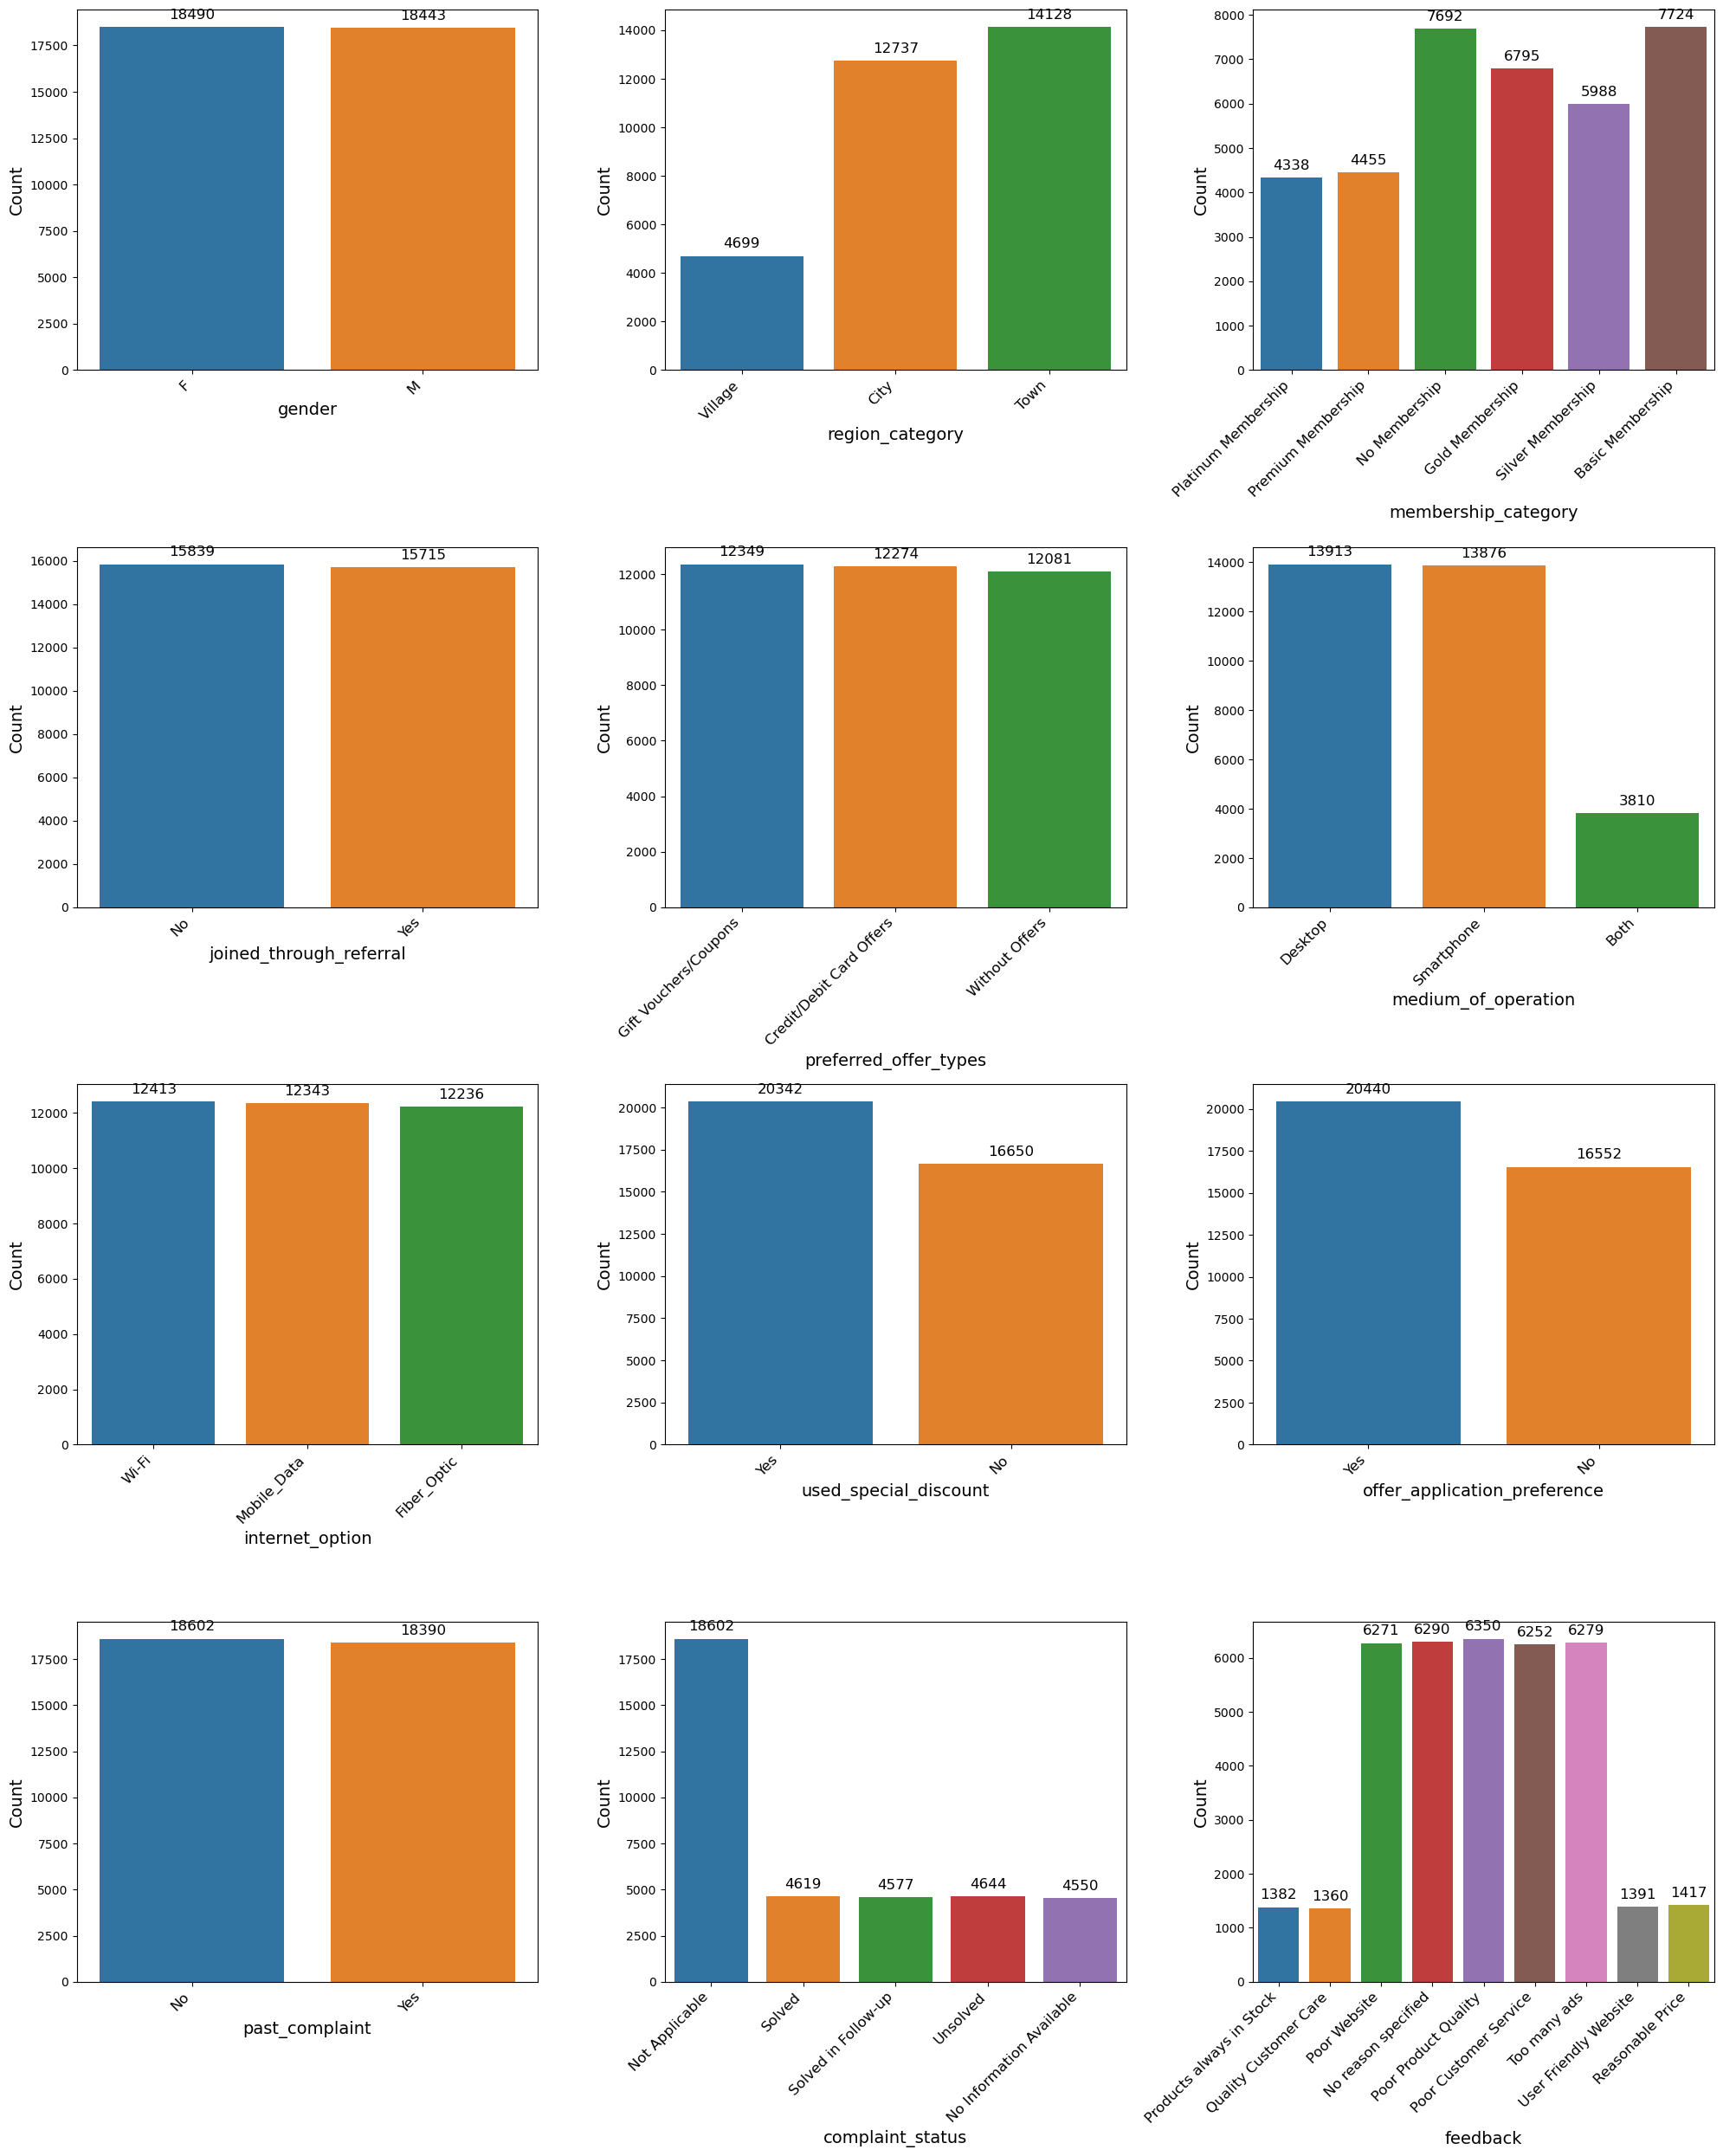

In [29]:
data_cat = df_cat.columns
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 25)) 

for variable, subplot in zip(data_cat, ax.flatten()):
    z = sns.countplot(x=df_cat[variable], ax=subplot) 
    z.set_xlabel(variable, fontsize=14)
    z.set_ylabel('Count', fontsize=14)
    z.set_xticklabels(z.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
    
    
    for p in subplot.patches:
        subplot.annotate(format(p.get_height(), '.0f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha = 'center', va = 'center', 
                         xytext = (0, 10), 
                         textcoords = 'offset points',
                         fontsize=12)
plt.tight_layout()
plt.show()

##### As we can see both genders, Male and Female are equally distributed.

##### Most of the customers are from town region while least number of customer belongs to village which is 4699.

#####  Basic category & No are leading one in membership_category while platinum & premium are least subscribed which is around ~4300+

##### Around 15K customers have joined through referral program

##### Most of the customers either use Desktop or Smartphone to access website

##### Most of the customers has given negative feedback about the service such as poor website, poor product quality ,poor customer service etc.

# 4.4 Bivariate and Multivariate Analysis <a id="bivariate_multivariate_analysis"></a>

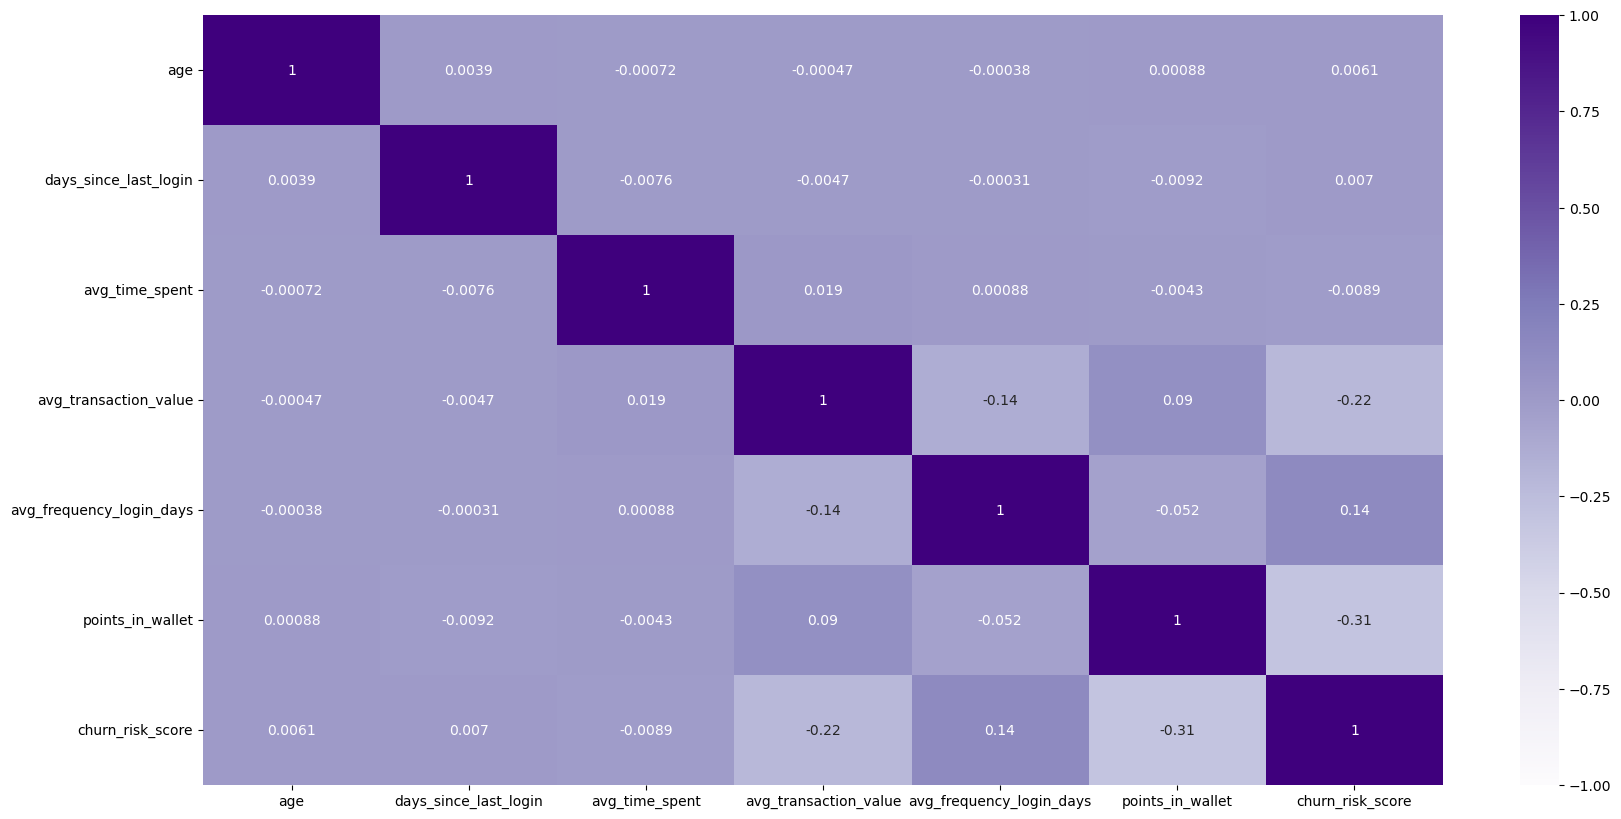

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(df_num.corr(), vmax=1, vmin=-1,cmap='Purples', annot=True)
plt.show()

##### There isn't high correlation between independent features and customer chrun

##### Maximum -ve correlation between point in wallet and customer chrun is -0.31

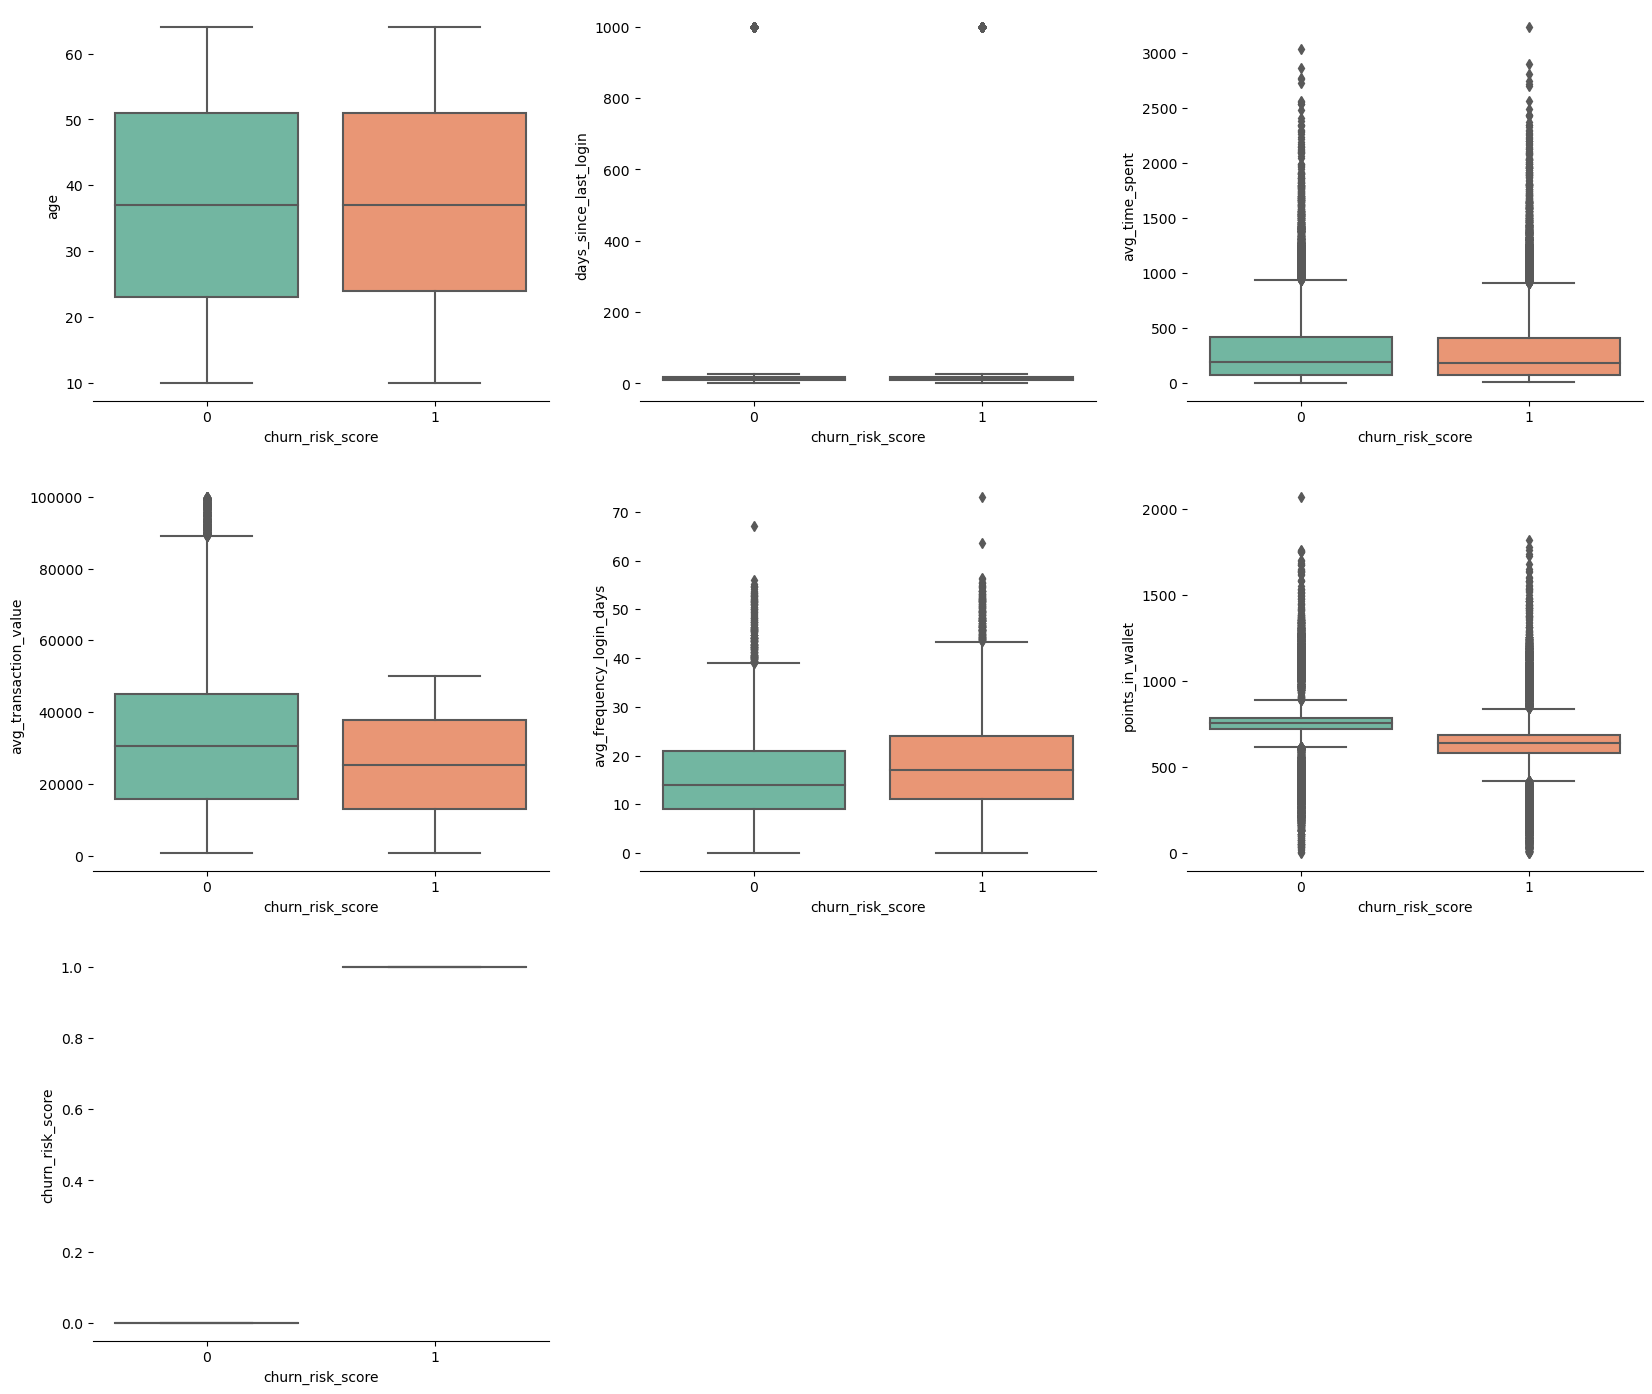

In [31]:
numeric_columns = df_num.columns
plt.figure(figsize=(20, 60))

sns.set_palette(sns.color_palette("Set2", 8))
for i, variable in enumerate(numeric_columns):
        plt.subplot(10,3,i+1)
        
        sns.boxplot(x='churn_risk_score',y= df[variable], data=df)     
        sns.despine(top=True,right=True,left=True) 
        

##### Outliers have been identified in the variables 'avg_time_spent' , 'points_in_wallet' and avg_frequency_login_days

<Figure size 2000x6000 with 0 Axes>

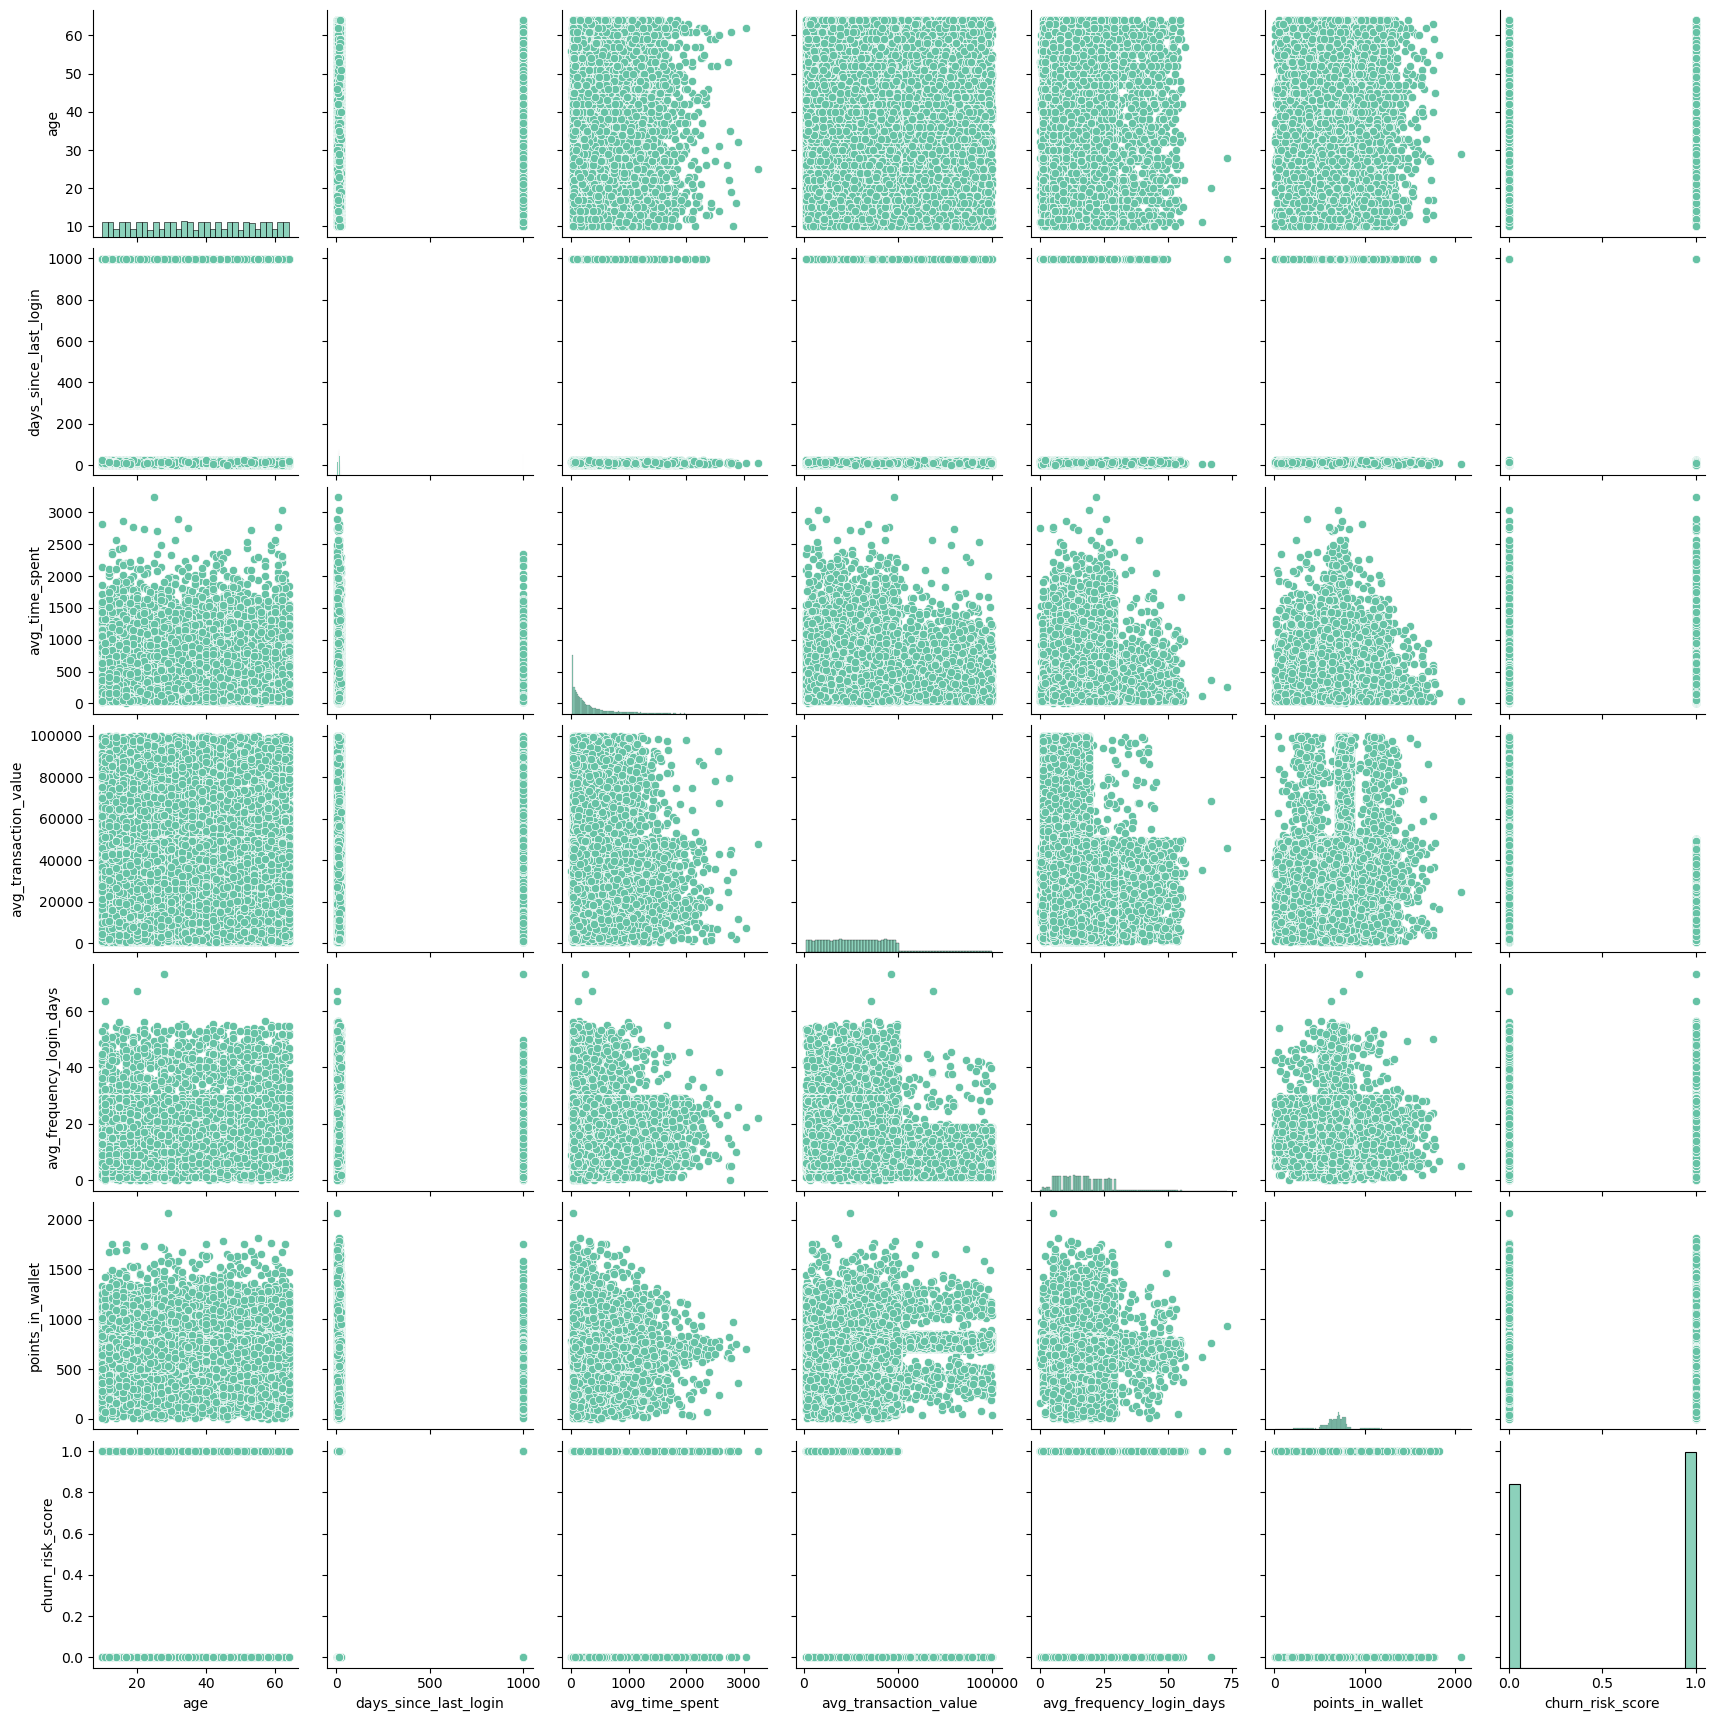

In [32]:
plt.figure(figsize=(20, 60))
sns.pairplot(df)
plt.show()

##### Multivariate statistics compare more than two variables.

##### we can see the all the plots from the above plots.

# 4.5 Missing Value Treatment <a id="missing_value_treatment"></a>

In [33]:
import missingno as ms

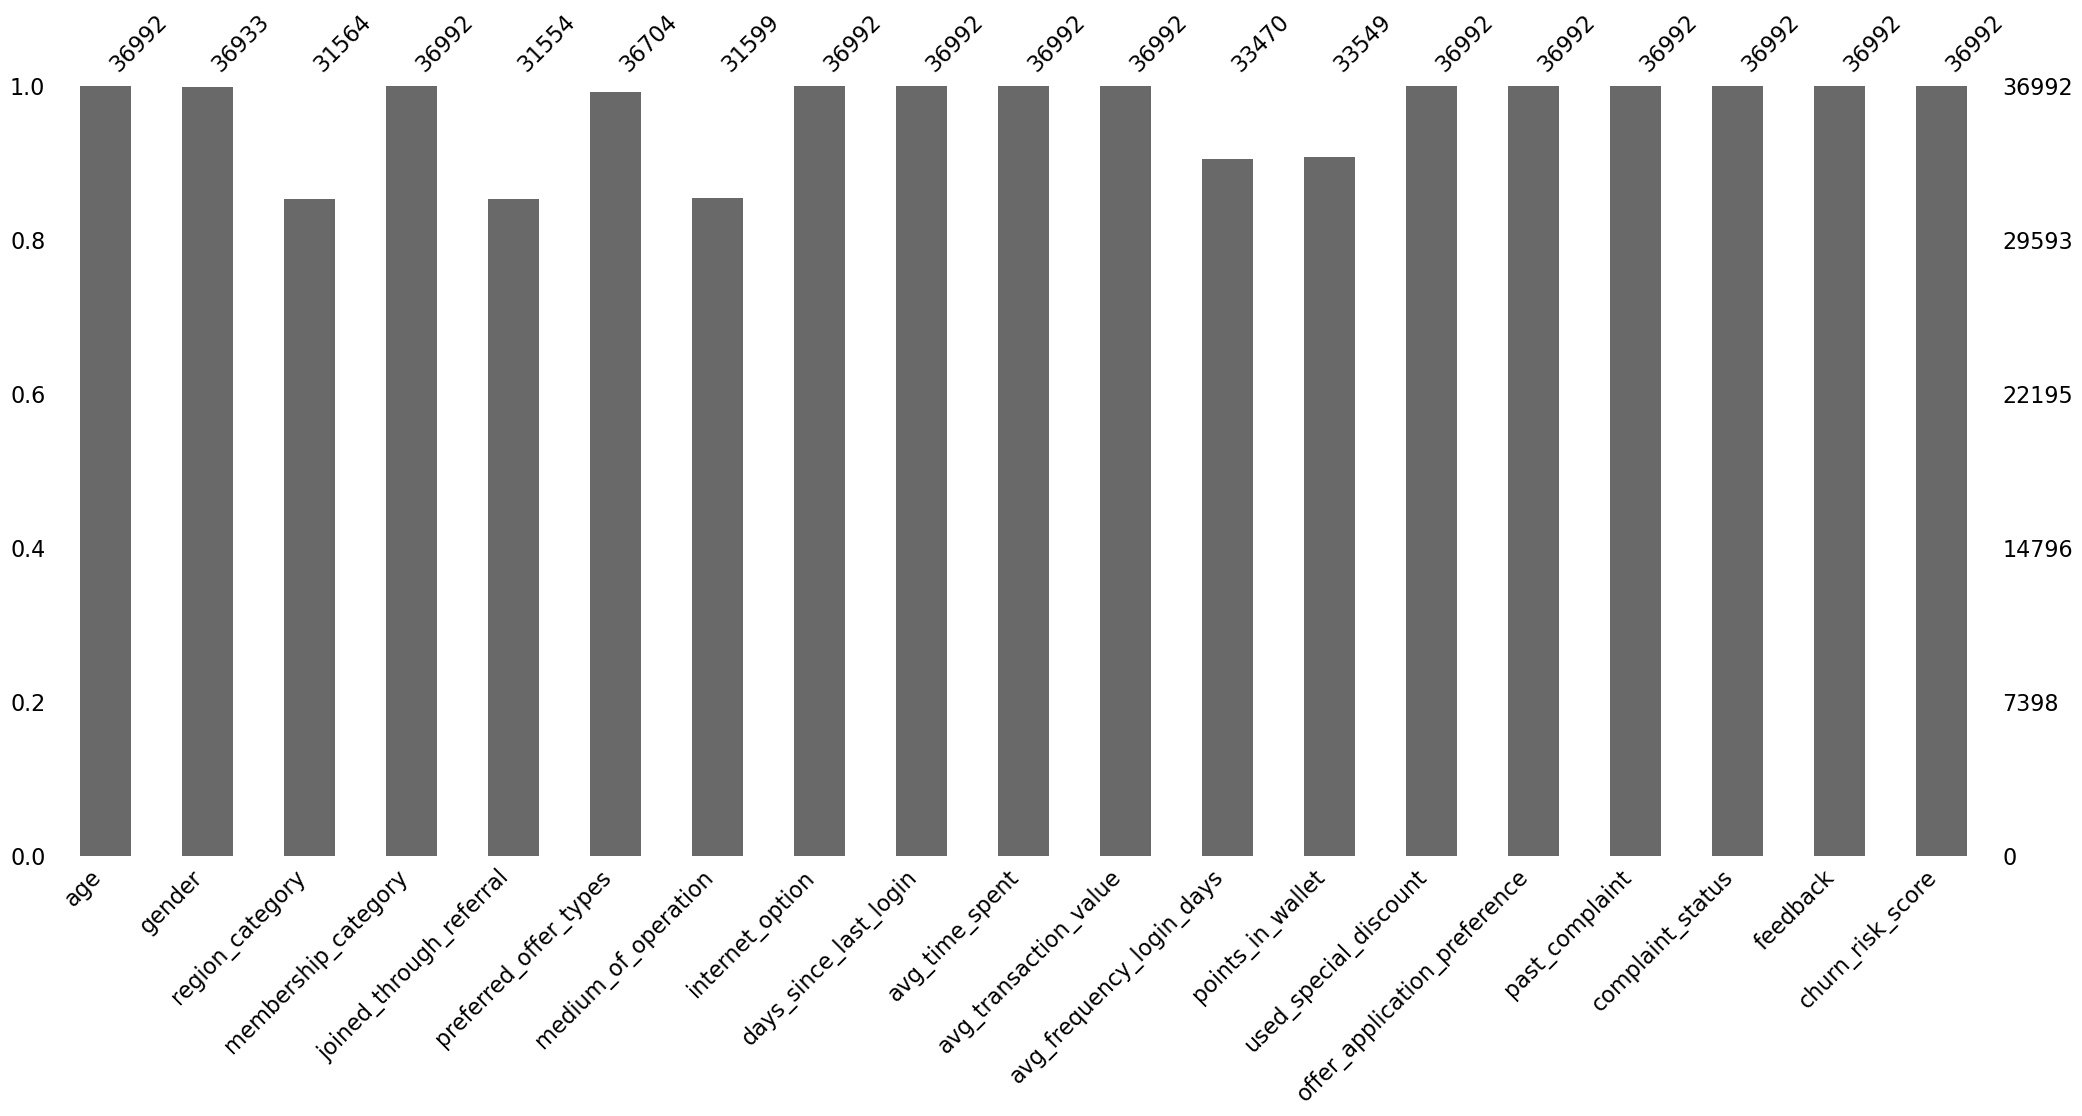

In [34]:
ms.bar(df)
plt.show()

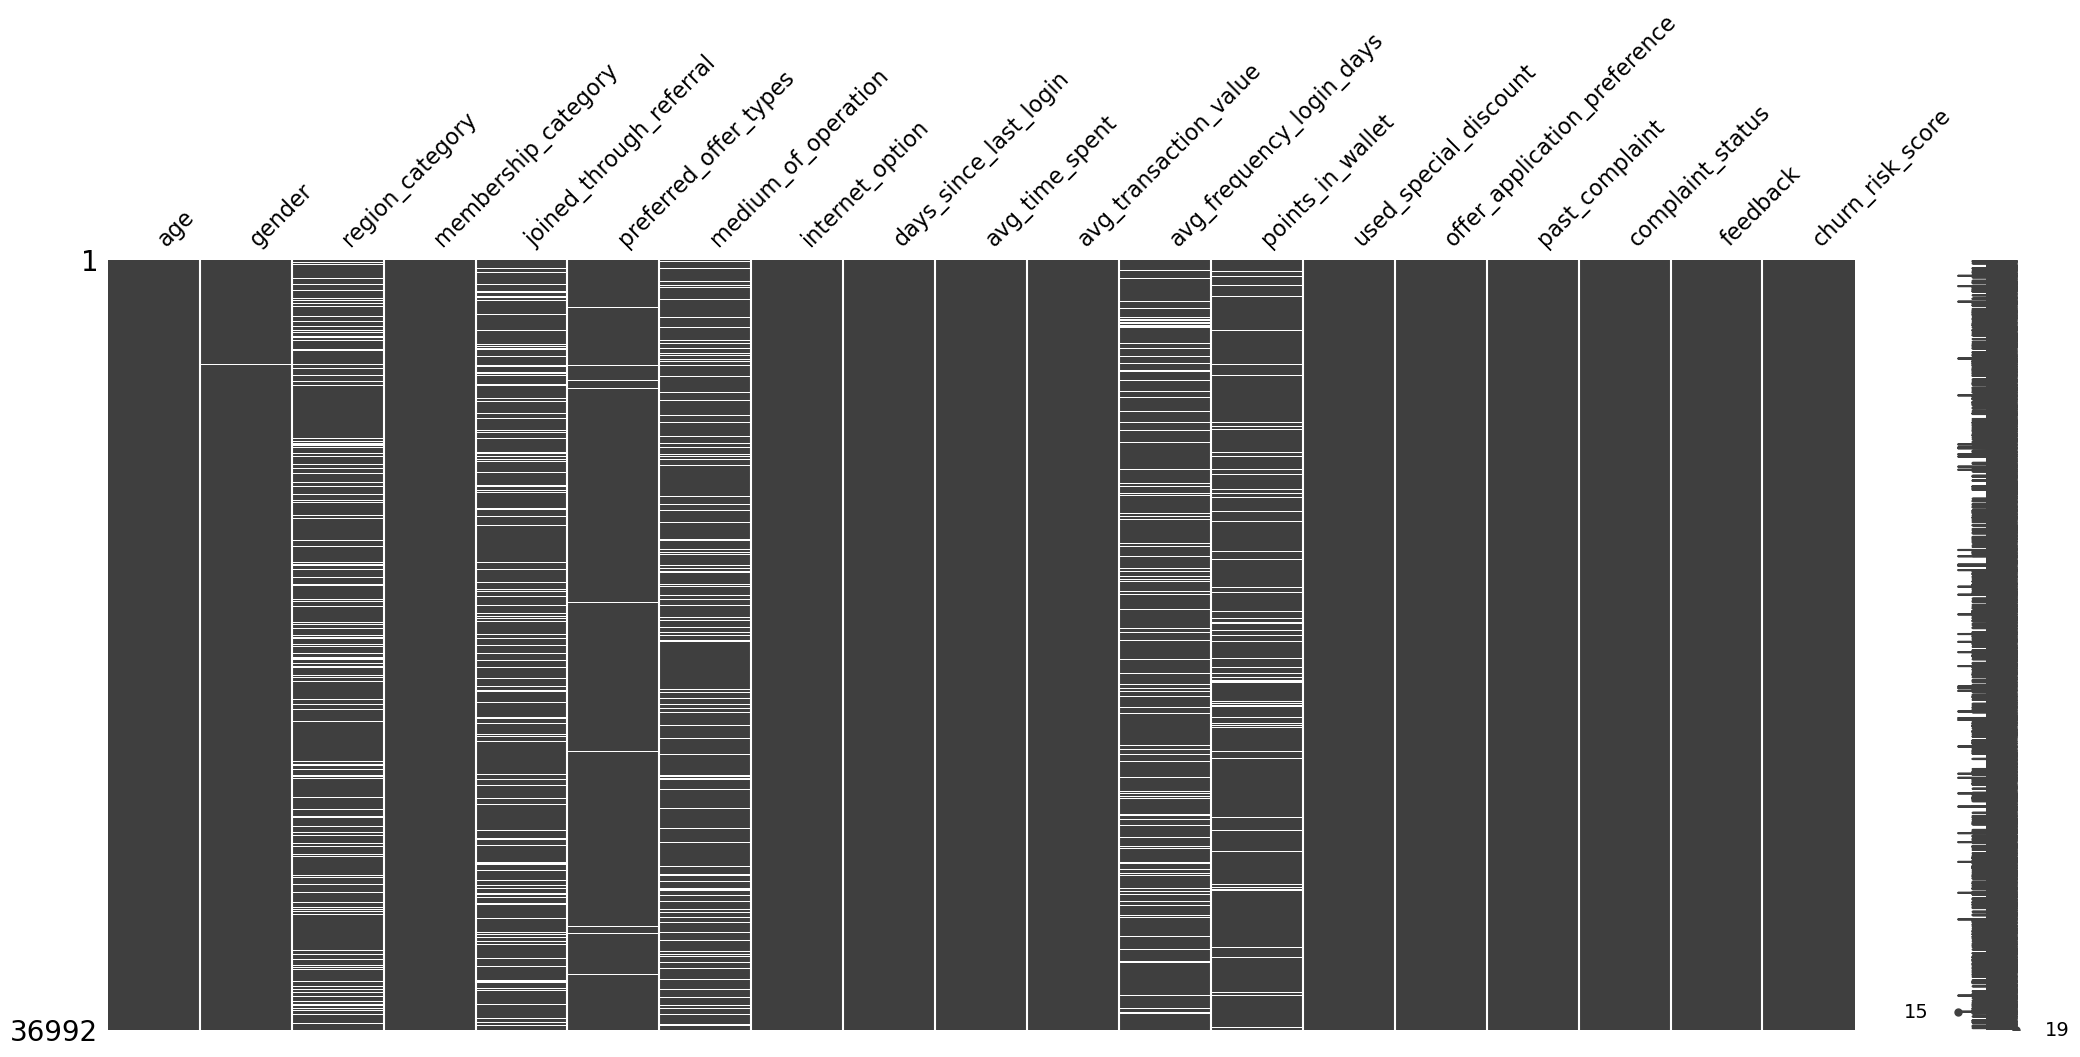

In [35]:
ms.matrix(df)
plt.show()

##### There are 7 features that has missing values, which are joined_through_referral has the most missing values around 15%

In [36]:
def missing_value_percentage(df):
    missvalcount = df.isnull().sum()
    missvalpercent = round(df.isnull().sum() / df.shape[0] * 100)
    dtypes = df.dtypes
    newdf = pd.concat([missvalcount, missvalpercent, dtypes], axis=1)
    newdf.columns = ['missvalcount', 'missval%', 'dtype']
    newdf = newdf[newdf['missvalcount'] != 0].sort_values(by='missvalcount', ascending=False)
    return newdf

In [37]:
missing_value_percentage(df)

missvalcount  missval%    dtype
joined_through_referral           5438      15.0   object
region_category                   5428      15.0   object
medium_of_operation               5393      15.0   object
avg_frequency_login_days          3522      10.0  float64
points_in_wallet                  3443       9.0  float64
preferred_offer_types              288       1.0   object
gender                              59       0.0   object

### Missing values treatment for numerical variable  

In [38]:
num_names = ['avg_frequency_login_days','points_in_wallet']
for col in num_names:
    df[col] = df[col].fillna(df[col].median())

### Missing values treatment for categorical variable

In [39]:
Missing_cat = ['joined_through_referral','region_category','medium_of_operation','preferred_offer_types','gender']
for i,col in enumerate(Missing_cat):
    df[col].fillna(df[col].mode()[0],inplace=True)

##### 1. For imputing missing values for categorical features we have used mode value

##### 2. For imputing missing values for numerical featurers we have used median value

In [40]:
missing_value_percentage(df)

Empty DataFrame
Columns: [missvalcount, missval%, dtype]
Index: []

In [41]:
df_cat2 = df.select_dtypes(include='object')
df_num2 = df.select_dtypes(exclude='object')

# 4.6 Outliers Analysis <a id="outliers_analysis"></a>

### 4.6.1 Discovery of Outliers

In [42]:
Q1 = df_num2.quantile(0.25) 
Q3 = df_num2.quantile(0.75) 
IQR = Q3 - Q1 

outlier = ((df_num2 < (Q1 - 1.5 * IQR)) | (df_num2 > (Q3 + 1.5 * IQR)))
for i in outlier.columns:
    num_outliers = len(outlier[outlier[i] == True][i])
    if num_outliers > 0:
        print(f'Total number of outliers in column {i} are {num_outliers}')

Total number of outliers in column days_since_last_login are 1999
Total number of outliers in column avg_time_spent are 2814
Total number of outliers in column avg_transaction_value are 1131
Total number of outliers in column avg_frequency_login_days are 419
Total number of outliers in column points_in_wallet are 4779


### 4.6.2 Visualizing outliers using Boxplots & distplot

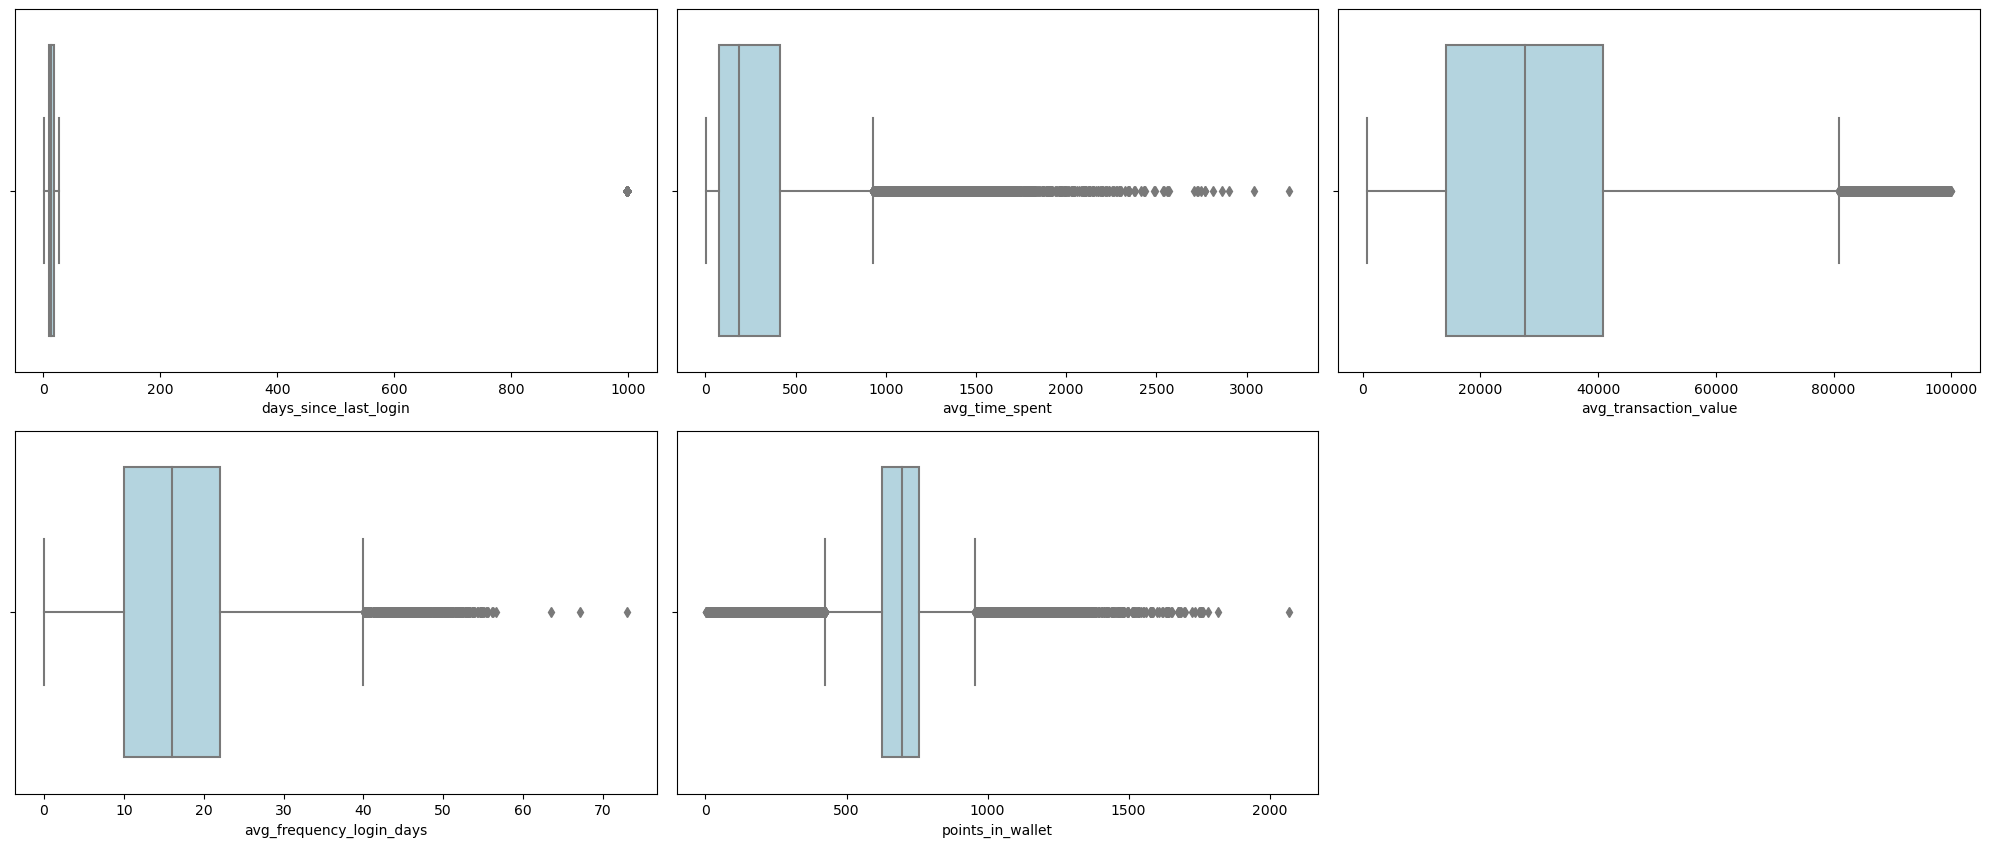

In [43]:
columns_to_plot = ['days_since_last_login','avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet']
plt.figure(figsize=(20, 25))
for i,col_name in enumerate(columns_to_plot,1):
    plt.subplot(6,3,i)
    sns.boxplot(x=df[col_name],color='lightblue')
    plt.tight_layout()
plt.show()

##### avg_time_spent,points in wallet , avg_time_spent and avg frequency login days are having outliers in large numbers, which will be treated .

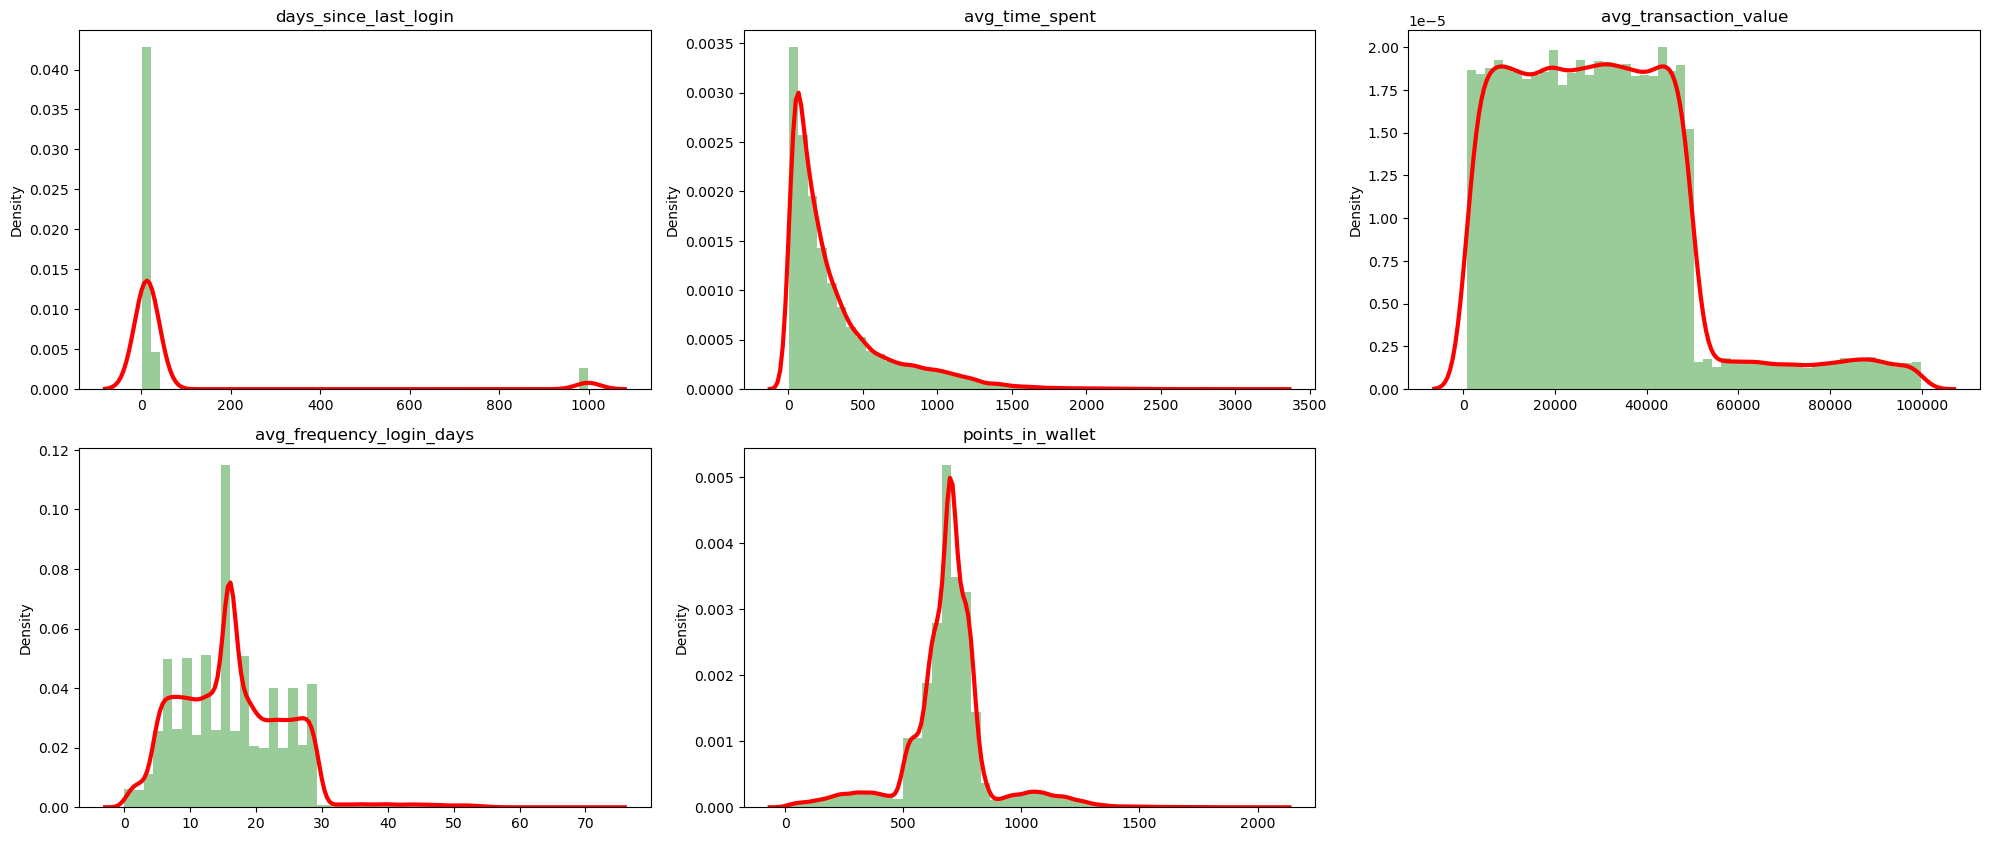

In [44]:
columns_to_plot = ['days_since_last_login', 'avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet']
plt.figure(figsize=(20,25))
for i,col_name in enumerate(columns_to_plot,1):
    plt.subplot(6,3,i)
    sns.distplot(x=df[col_name],color='green',kde_kws={'color': 'red', 'lw': 3})
    plt.title(col_name)
plt.tight_layout()
plt.show()

In [45]:
df[['days_since_last_login','avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']].skew()

days_since_last_login       3.941162
avg_time_spent              1.992459
avg_transaction_value       1.011027
avg_frequency_login_days    0.686719
points_in_wallet            0.190623
dtype: float64

### 4.6.3 Removal of Outliers

In [46]:
def outlier(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - 1.5 * IQR
    upper_limit = q3 + 1.5 * IQR
    filtered_value = df[(df[column_name] > lower_limit) & (df[column_name] < upper_limit)]
    return filtered_value 

In [47]:
df2 = outlier(df, "days_since_last_login")  
df3 = outlier(df2, "avg_time_spent")  
df4 = outlier(df3, "avg_transaction_value")  
df5 = outlier(df4, "avg_frequency_login_days")  
df6 = outlier(df5, "points_in_wallet")

### 4.6.4 After removing outlier ,Visualizing using Boxplots & distplot

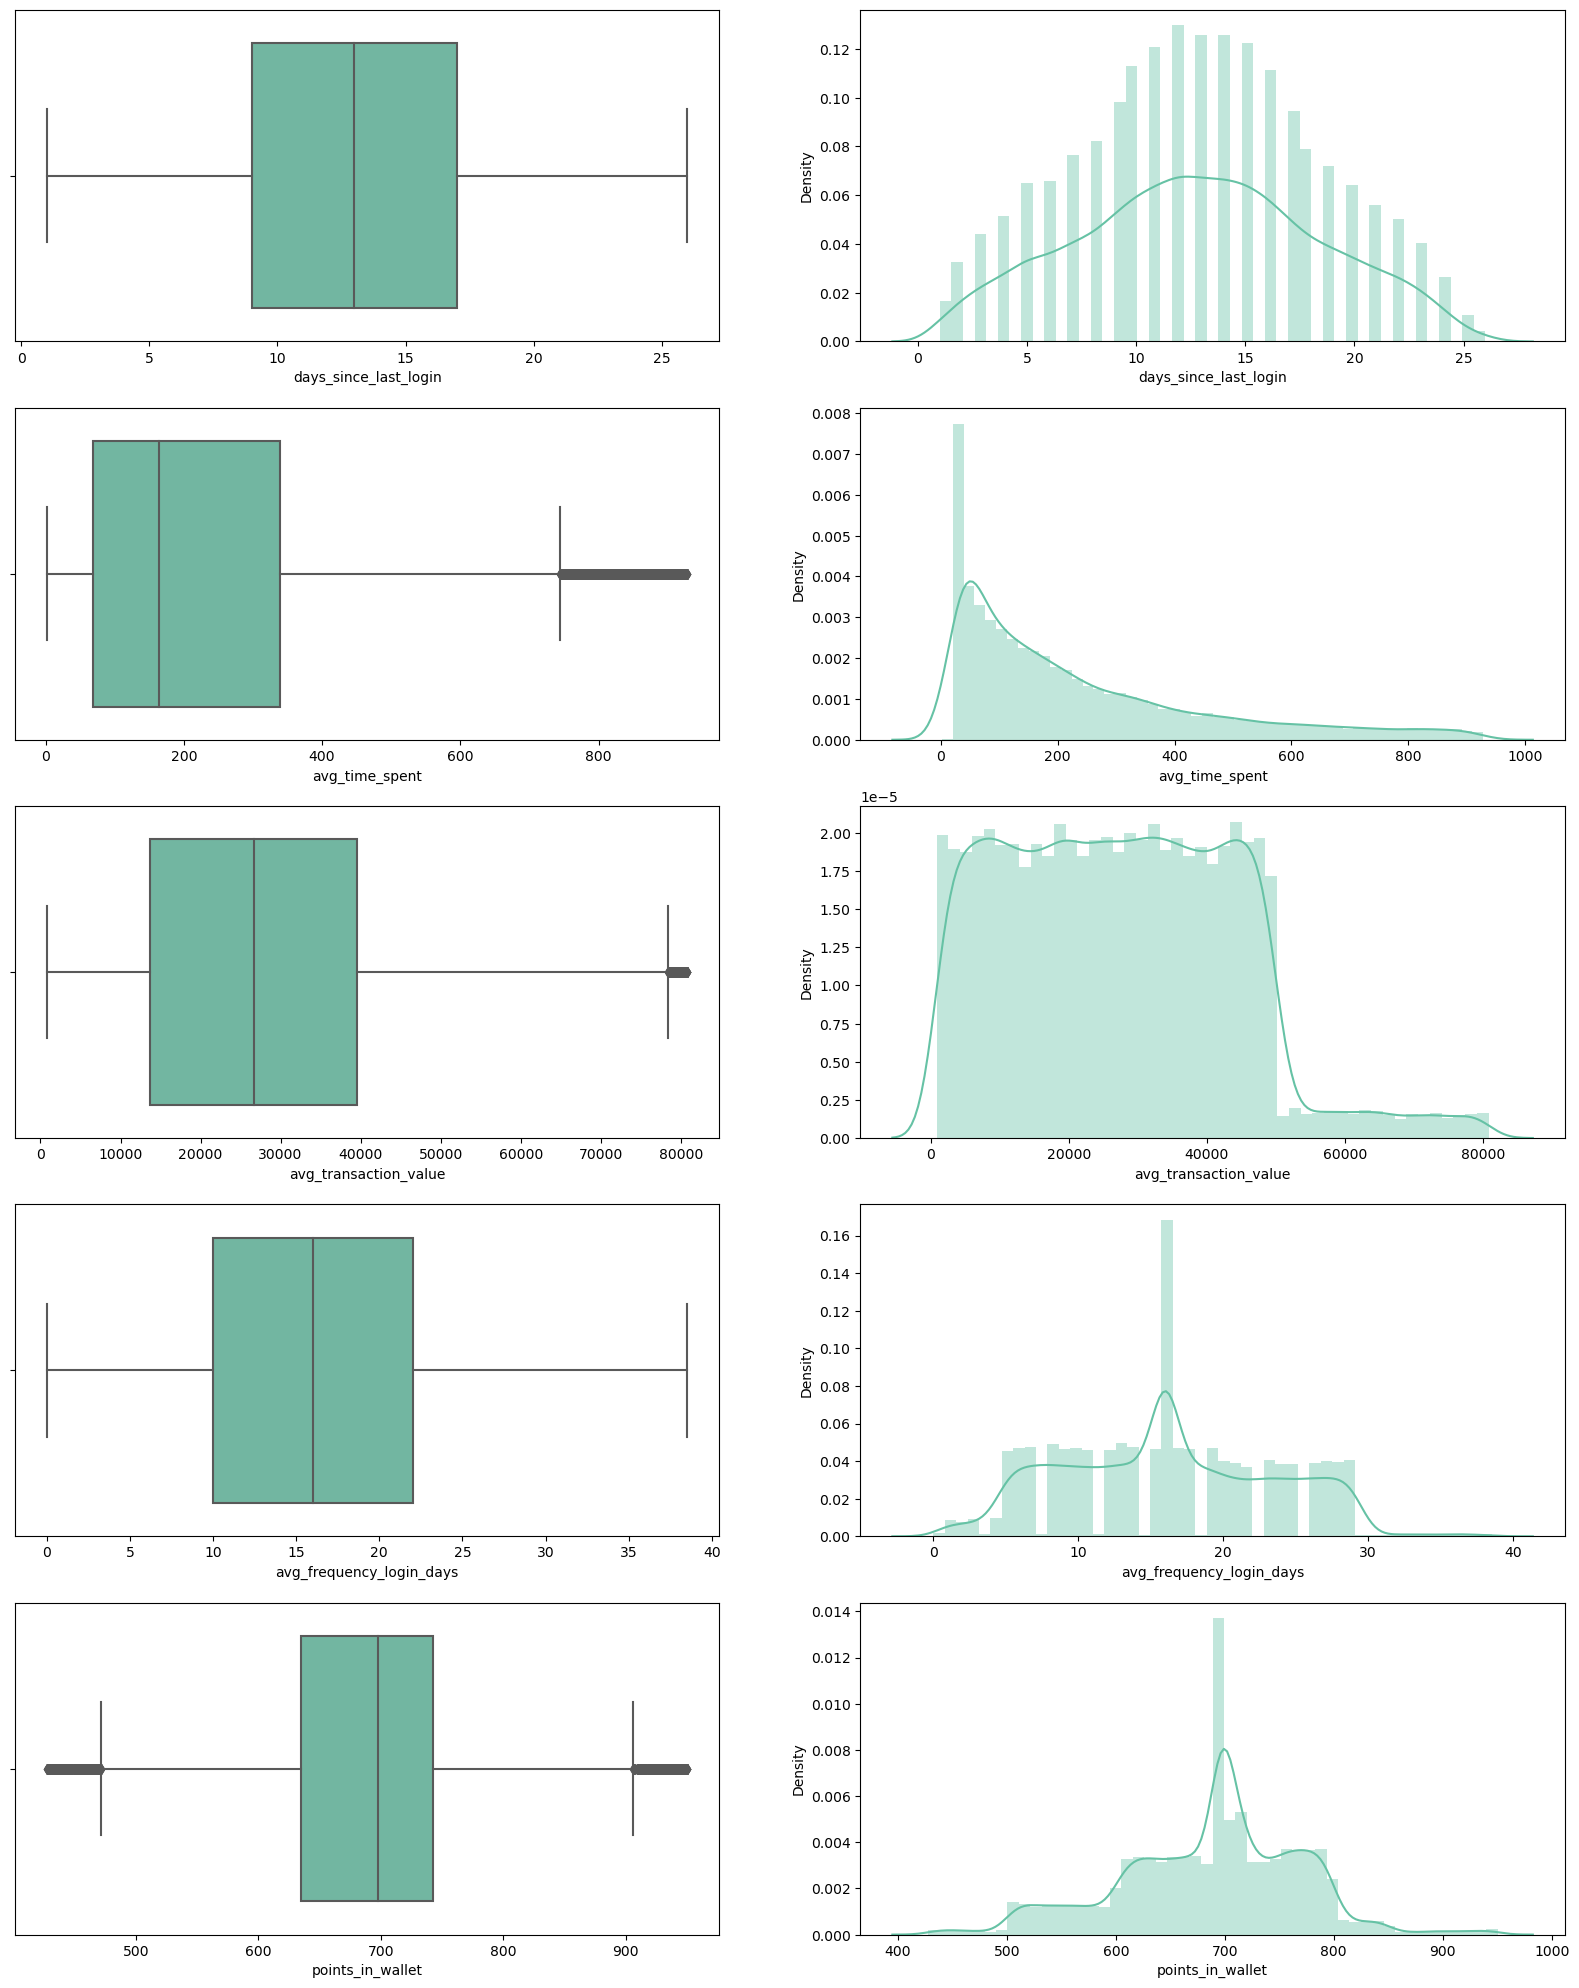

In [48]:
plt.figure(figsize=(20, 25))
plt.subplot(5,2,1)
sns.boxplot(x=df6["days_since_last_login"])
plt.subplot(5,2,2)
sns.distplot(df6["days_since_last_login"])
plt.subplot(5,2,3)
sns.boxplot(x=df6["avg_time_spent"])
plt.subplot(5,2,4)
sns.distplot(df6["avg_time_spent"])
plt.subplot(5,2,5)
sns.boxplot(x=df6["avg_transaction_value"])
plt.subplot(5,2,6)
sns.distplot(df6["avg_transaction_value"])
plt.subplot(5,2,7)
sns.boxplot(x=df6["avg_frequency_login_days"])
plt.subplot(5,2,8)
sns.distplot(df6["avg_frequency_login_days"])
plt.subplot(5,2,9)
sns.boxplot(x=df6["points_in_wallet"])
plt.subplot(5,2,10)
sns.distplot(df6["points_in_wallet"])
plt.show()

# 4.7 Data Scaling and Transformation <a id="data_scaling_transformation"></a>

In [49]:
df = df6.copy()

In [50]:
categorical_columns = ['gender', 'region_category', 'membership_category','joined_through_referral', 'preferred_offer_types',
                       'medium_of_operation', 'internet_option', 'used_special_discount','offer_application_preference', 
                       'past_complaint', 'complaint_status','feedback']
for column in categorical_columns:
    df[column] = LabelEncoder.fit_transform(df[column])

In [51]:
num_columns = ['days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']  


columns_to_scale = ['days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
for column in columns_to_scale:
    df[column] = standard_scale.fit_transform(df[[column]])

In [52]:
df

age  gender  region_category  membership_category  \
0       18       0                2                    3   
1       32       0                0                    4   
2       44       0                1                    2   
3       37       1                0                    2   
4       31       0                0                    2   
...    ...     ...              ...                  ...   
36986   27       1                1                    3   
36987   46       0                1                    0   
36988   29       0                1                    0   
36989   23       0                1                    0   
36991   35       1                1                    5   

       joined_through_referral  preferred_offer_types  medium_of_operation  \
0                            0                      1                    1   
1                            0                      1                    1   
2                            1                      1                    1   
3                            1                      1                    1   
4                            0                      0                    2   
...                        ...                    ...                  ...   
36986                        1                      0                    1   
36987                        0                      0                    1   
36988                        0                      2                    2   
36989                        1                      1                    1   
36991                        0                      1                    1   

       internet_option  days_since_last_login  avg_time_spent  \
0                    2               0.744433        0.284475   
1                    1               0.564917        0.310736   
2                    2               0.205883        1.275727   
3                    1              -0.332668       -0.853168   
4                    1               1.282984       -0.577863   
...                ...                    ...             ...   
36986                1               0.026366       -0.473463   
36987                2              -1.948320        1.894415   
36988                2               0.026366        1.836653   
36989                2              -0.153151       -0.385573   
36991                1               0.385400       -0.734004   

       avg_transaction_value  avg_frequency_login_days  points_in_wallet  \
0                   1.561456                  0.117657          1.151454   
1                  -0.885065                 -0.847226          0.136691   
2                  -0.386305                  0.806859         -2.239050   
3                  -0.129722                 -1.398588         -1.431173   
4                  -0.175763                 -0.020183         -0.280336   
...                      ...                       ...               ...   
36986              -1.166020                 -0.020183          0.751194   
36987              -0.005583                 -1.398588         -0.564426   
36988              -0.992793                  1.633902         -1.909723   
36989               0.655272                 -0.020183         -0.070315   
36991              -1.533666                 -0.020183          0.406185   

       used_special_discount  offer_application_preference  past_complaint  \
0                          1                             1               0   
1                          1                             0               1   
2                          0                             1               1   
3                          0                             1               1   
4                          0                             1               1   
...                      ...                           ...             ...   
36986                      1                             0               0   
36987                      0   

# 4.8 Train and Test Split <a id="train_test_split"></a>

In [53]:
Features = df.drop('churn_risk_score',axis = 1)
Target = df['churn_risk_score']

Features = sm.add_constant(Features)

Xtrain, xtest, Ytrain, ytest = train_test_split(Features,Target,test_size=0.20, random_state=10)

print(f'Xtrain {Xtrain.shape}')
print(f'Ytrain {Ytrain.shape}')

print(f'xtest {xtest.shape}')                        
print(f'ytest {ytest.shape}')

Xtrain (21526, 19)
Ytrain (21526,)
xtest (5382, 19)
ytest (5382,)


# 5. Model Building <a id="model_building"></a>

# 5.1 Logistic Regression <a id="logistic_regression"></a>

In [54]:
#Xtrain.drop(['age','gender','region_category','internet_option','preferred_offer_types','medium_of_operation','days_since_last_login','avg_time_spent','past_complaint','complaint_status'],axis=1,inplace=True)
logreg = sm.Logit(Ytrain,Xtrain).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.426916
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       churn_risk_score   No. Observations:                21526
Model:                          Logit   Df Residuals:                    21507
Method:                           MLE   Df Model:                           18
Date:                Wed, 08 Nov 2023   Pseudo R-squ.:                  0.3785
Time:                        22:26:32   Log-Likelihood:                -9189.8
converged:                       True   LL-Null:                       -14787.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.9558      0.116     16.856      0.000       1.728       2.183
age                              0.0009      0.001      0.789      0.430      -0.001       0.003
gender                          -0.0373      0.037     -1.014      0.310      -0.110       0.035
region_category                 -0.0349      0.028     -1.229      0.219      -0.091       0.021
membership_category             -0.4756      0.011    -42.931      0.000      -0.497      -0.454
joined_through_referral          0.1346      0.038      3.586      0.000       0.061       0.208
preferred_offer_types            0.0305      0.023      1.354      0.176      -0.014       0.075
medium_of_operation              0.0451      0.030      1.491      0.136      -0.014       0.104
internet_option                 -0.0191      0.022     -0.851      0.395      -0.063       0.025
days_since_last_login            0.0123      0.019      0.663      0.507      -0.024       0.049
avg_time_spent                   0.0057      0.020      0.288      0.773      -0.033       0.045
avg_transaction_value           -0.1890      0.019     -9.799      0.000      -0.227      -0.151
avg_frequency_login_days         0.1426      0.019      7.617      0.000       0.106       0.179
points_in_wallet                -1.5916      0.028    -57.089      0.000      -1.646      -1.537
used_special_discount           -0.2217      0.071     -3.125      0.002      -0.361      -0.083
offer_application_preference    -0.2376      0.071     -3.351      0.001      -0.377      -0.099
past_complaint                   0.0226      0.043      0.524      0.600      -0.062       0.107
complaint_status                -0.0229      0.018     -1.292      0.196      -0.058       0.012
feedback                        -0.0961      0.007    -13.028      0.000      -0.111      -0.082
================================================================================================
"""

In [55]:
logreg.aic  

18417.5991302198

In [56]:
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 
df_odds

Odds
const                         7.069606
age                           1.000918
gender                        0.963345
region_category               0.965679
membership_category           0.621487
joined_through_referral       1.144124
preferred_offer_types         1.030962
medium_of_operation           1.046167
internet_option               0.981069
days_since_last_login         1.012411
avg_time_spent                1.005730
avg_transaction_value         0.827790
avg_frequency_login_days      1.153224
points_in_wallet              0.203594
used_special_discount         0.801172
offer_application_preference  0.788525
past_complaint                1.022818
complaint_status              0.977393
feedback                      0.908409

In [57]:
#xtest.drop(['age','gender','region_category','internet_option','preferred_offer_types','medium_of_operation','days_since_last_login','avg_time_spent','past_complaint','complaint_status'],axis=1,inplace=True)
y_pred_prob = logreg.predict(xtest)
y_pred_prob.head()

32351    0.628410
16596    0.048225
21825    0.286789
637      0.062218
4442     0.826475
dtype: float64

In [58]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

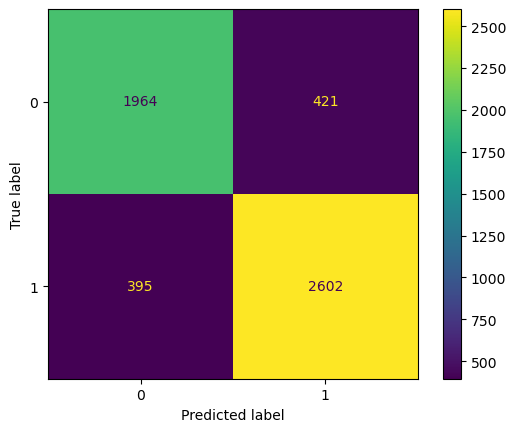

In [59]:
cm = confusion_matrix(ytest, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [60]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      2385
           1       0.86      0.87      0.86      2997

    accuracy                           0.85      5382
   macro avg       0.85      0.85      0.85      5382
weighted avg       0.85      0.85      0.85      5382



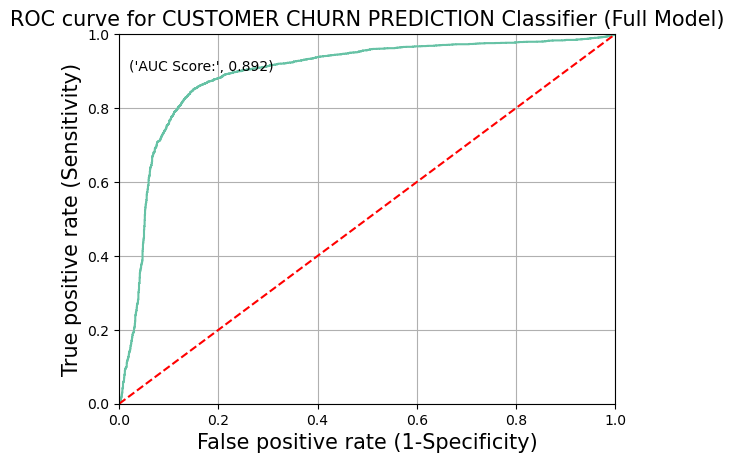

In [61]:
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for CUSTOMER CHURN PREDICTION Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(ytest, y_pred_prob),4)))
plt.grid(True)

In [62]:
youdens_table = pd.DataFrame({'TPR': tpr,'FPR': fpr,'Threshold': thresholds})
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
youdens_table.head()

TPR       FPR  Threshold  Difference
0  0.853187  0.151782   0.541882    0.701405
1  0.850517  0.149266   0.548148    0.701251
2  0.849850  0.148847   0.549313    0.701003
3  0.853520  0.152621   0.540037    0.700900
4  0.849850  0.149266   0.548694    0.700584

In [63]:
y_pred_youden = [ 0 if x < 0.541882 else 1 for x in y_pred_prob]

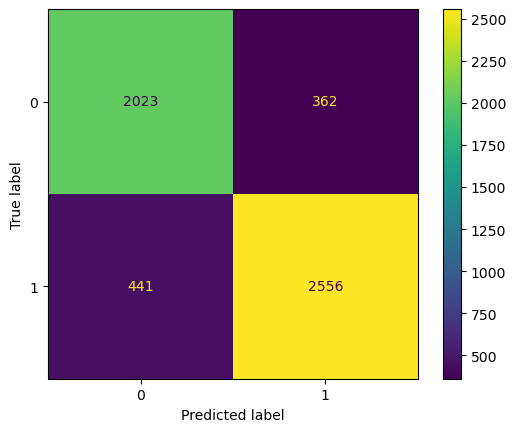

In [64]:
cm = confusion_matrix(ytest, y_pred_youden)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [65]:
print(classification_report(ytest, y_pred_youden))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      2385
           1       0.88      0.85      0.86      2997

    accuracy                           0.85      5382
   macro avg       0.85      0.85      0.85      5382
weighted avg       0.85      0.85      0.85      5382



## Checking for overfitting

In [66]:
lg = LogisticRegression()
lg.fit(Xtrain,Ytrain)
y_pred_train = lg.predict(Xtrain)
y_pred_test= lg.predict(xtest)
Logistic_train_accuracy = accuracy_score(Ytrain,y_pred_train)
Logistic_test_accuracy = accuracy_score(ytest,y_pred_test)
print('Logistic Regression:')
print("Training Accuracy:",Logistic_train_accuracy)
print("Test Accuracy:",Logistic_test_accuracy)

Logistic Regression:
Training Accuracy: 0.8509244634395614
Test Accuracy: 0.8491267186919361


## Cross-Validation

In [67]:
scores = cross_val_score (lg, Xtrain, Ytrain, cv=5)
print("Cross-Validation Scores: ", scores)
print("Mean Cross-Validation Score: ", np.mean (scores))

print('All scores: ', scores)
print("\nMinimum score obtained: ", round (min(scores), 4)) 
print("Maximum score obtained:",    round (max (scores), 4))
print("Average score obtained: ",   round (np.mean (scores), 4))

Cross-Validation Scores:  [0.8481189  0.85667828 0.85481998 0.84297329 0.8485482 ]
Mean Cross-Validation Score:  0.850227729667649
All scores:  [0.8481189  0.85667828 0.85481998 0.84297329 0.8485482 ]

Minimum score obtained:  0.843
Maximum score obtained: 0.8567
Average score obtained:  0.8502


# 5.2 Decision Tree <a id="decision_tree"></a>

In [68]:
d_tree = DecisionTreeClassifier(criterion= 'gini',
                                 max_depth= 4,
                                 max_features = 'sqrt',
                                 min_samples_split = 2,
                                 min_samples_leaf = 6,
                                 max_leaf_nodes = 9,
                                 random_state=10)
dt_model = d_tree.fit(Xtrain,Ytrain)

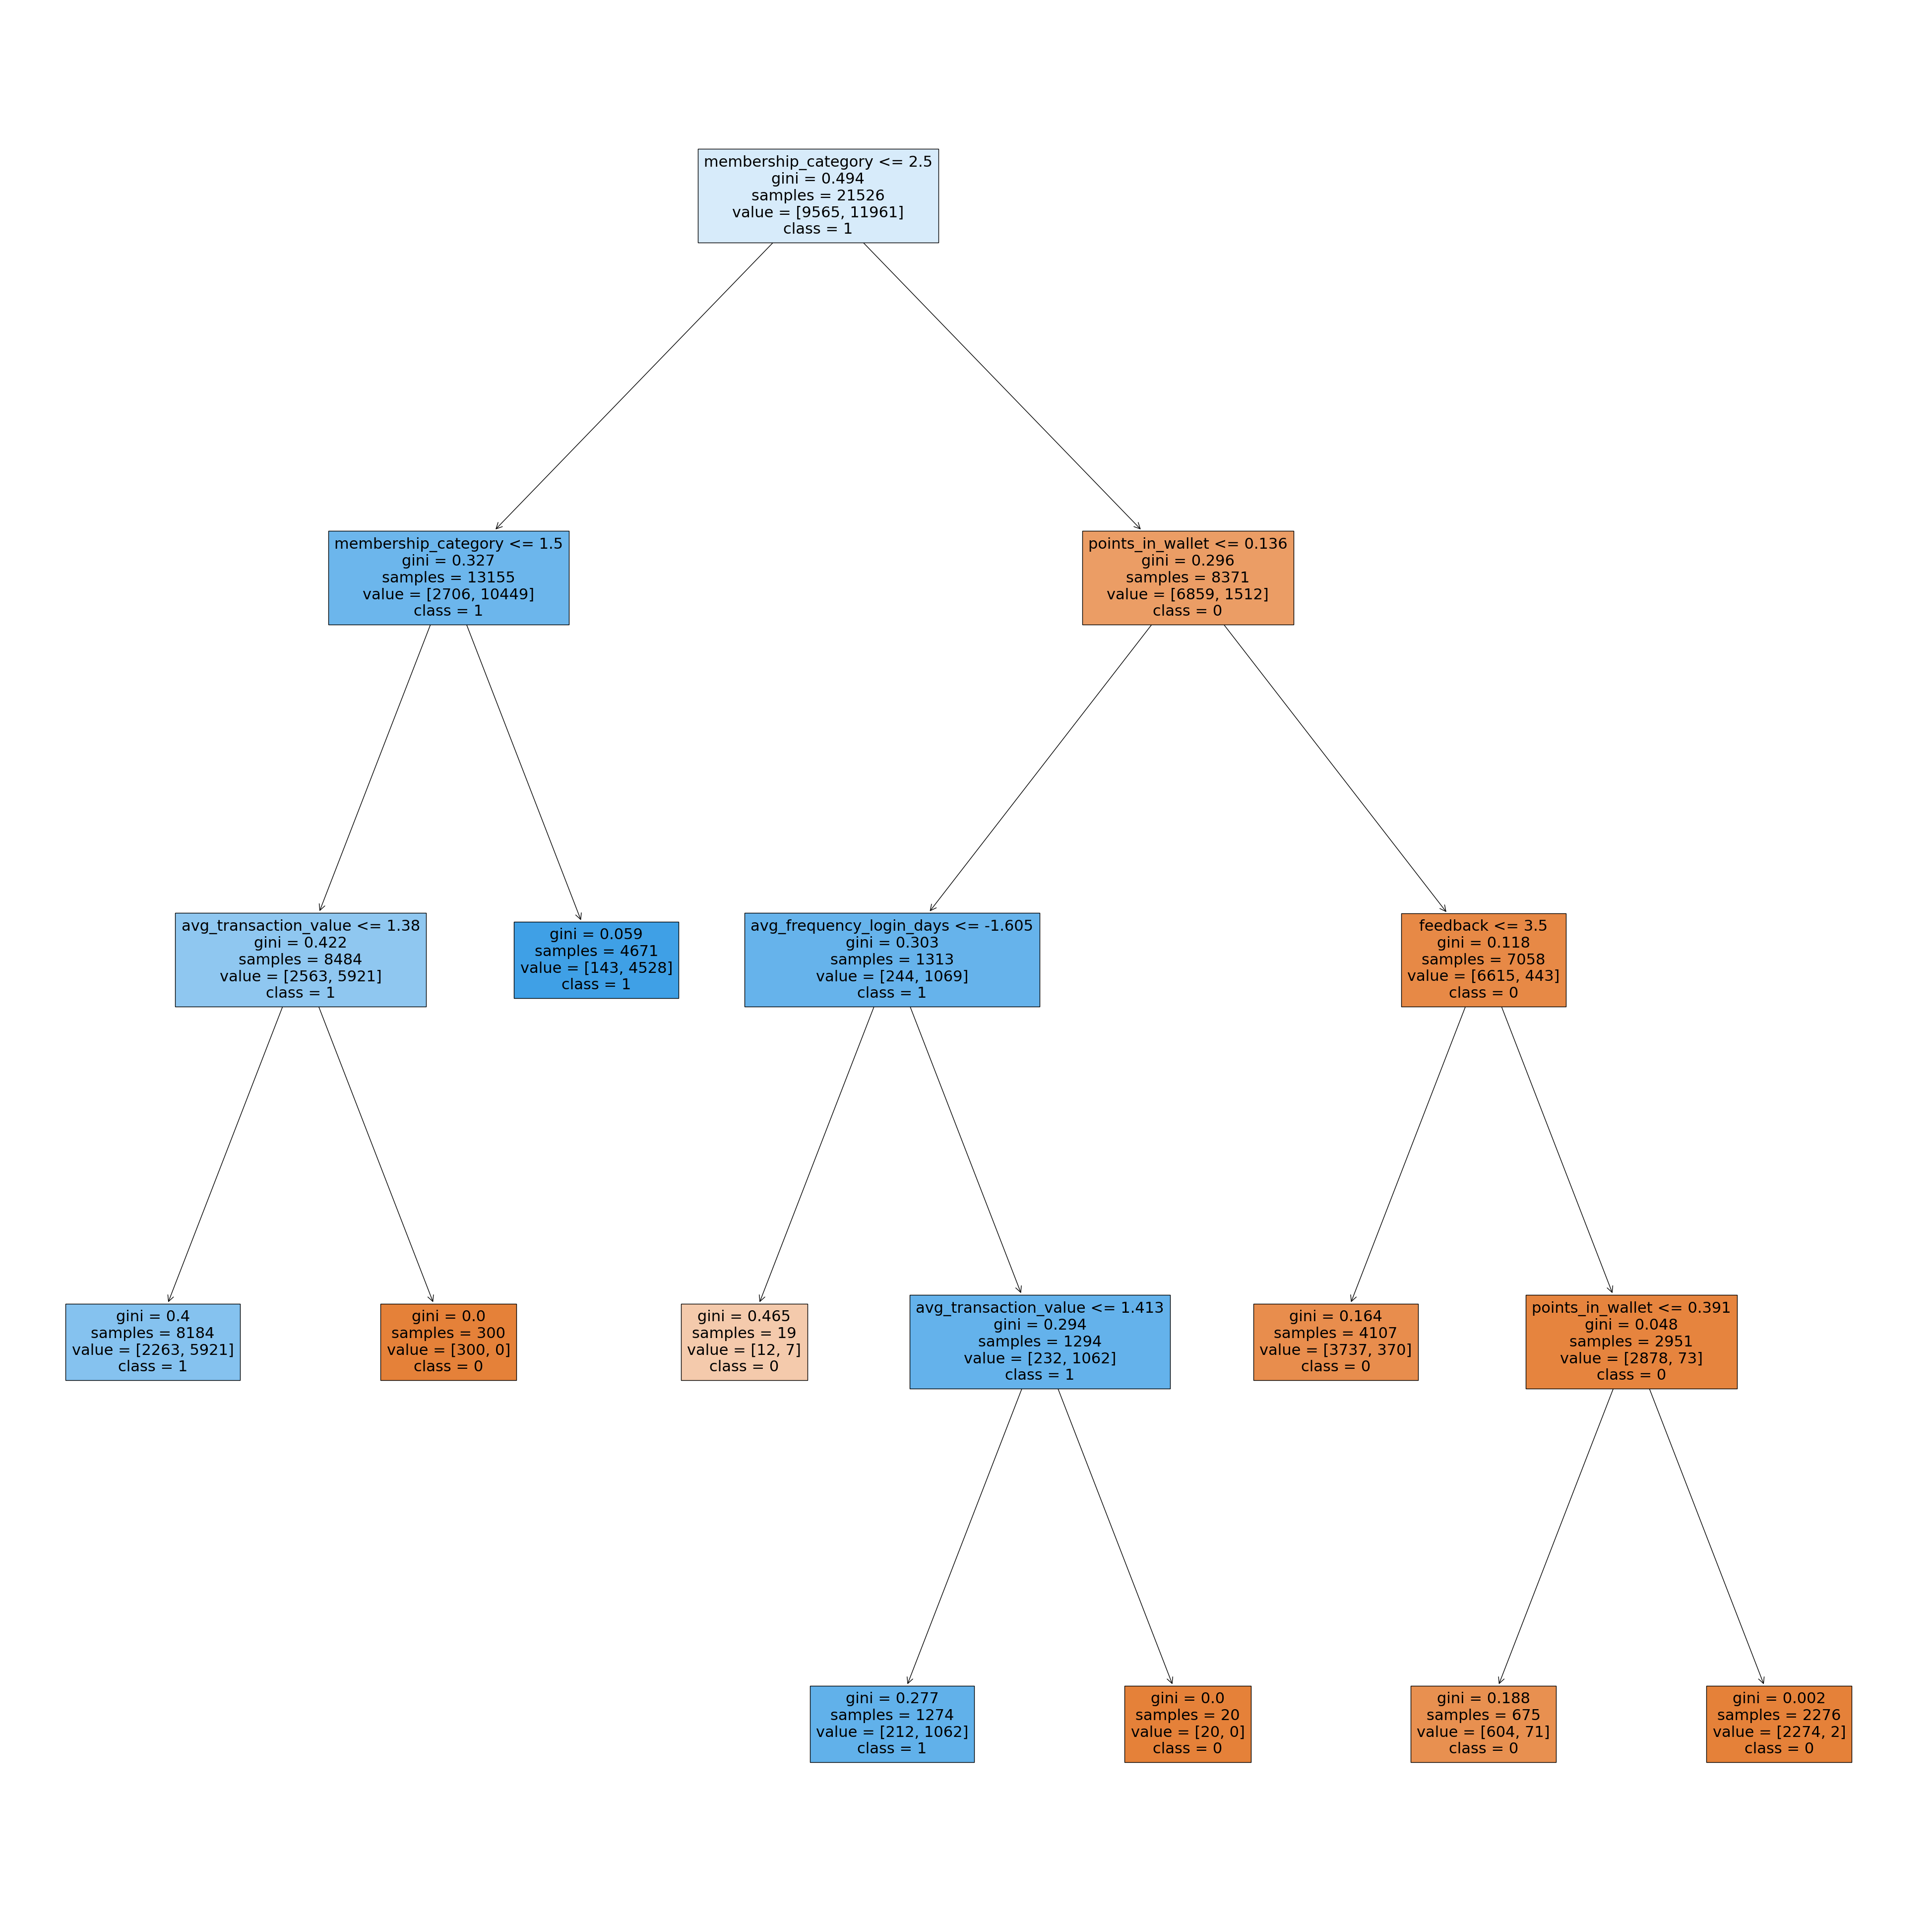

In [69]:
plt.figure(figsize=(50,50))
tree.plot_tree(dt_model,feature_names=list(Xtrain.columns.values),class_names=['0','1'],filled=True)
plt.show()

In [70]:
y_pred_prob = dt_model.predict(xtest)

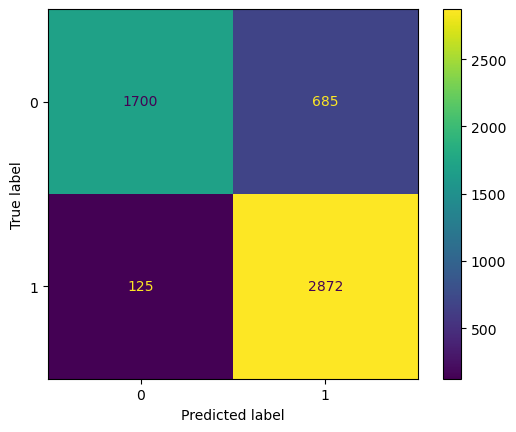

In [71]:
cm = confusion_matrix(ytest, y_pred_prob)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

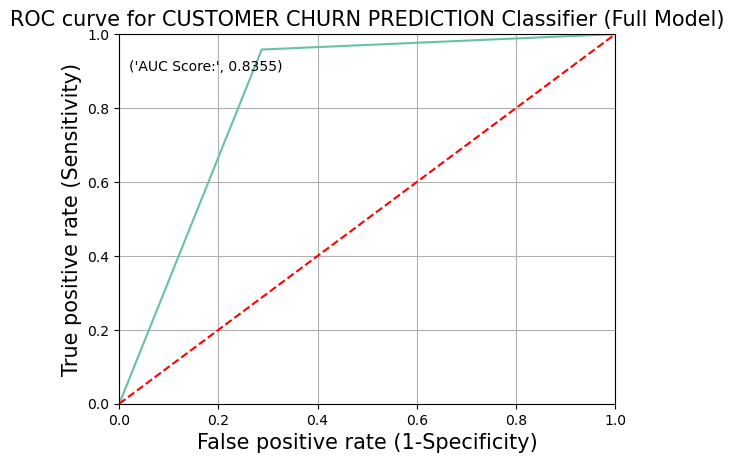

In [72]:
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for CUSTOMER CHURN PREDICTION Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(ytest, y_pred_prob),4)))
plt.grid(True)

In [73]:
print(classification_report(ytest, y_pred_prob))

              precision    recall  f1-score   support

           0       0.93      0.71      0.81      2385
           1       0.81      0.96      0.88      2997

    accuracy                           0.85      5382
   macro avg       0.87      0.84      0.84      5382
weighted avg       0.86      0.85      0.85      5382



## Checking for overfitting

In [74]:
dt_model.fit(Xtrain,Ytrain)
y_pred_train = dt_model.predict(Xtrain)
y_pred_test= dt_model.predict(xtest)
Decision_Tree_train_accuracy = accuracy_score(Ytrain,y_pred_train)
Decision_Tree_test_accuracy = accuracy_score(ytest,y_pred_test)
print("Decision Tree:")
print("Training Accuracy:",Decision_Tree_train_accuracy)
print("Test Accuracy:",Decision_Tree_test_accuracy)

Decision Tree:
Training Accuracy: 0.8574746817801728
Test Accuracy: 0.8494983277591973


## Cross-Validation

In [75]:
scores = cross_val_score (dt_model, Xtrain, Ytrain, cv=5)
print("Cross-Validation Scores: ", scores)
print("Mean Cross-Validation Score: ", np.mean (scores))

print('All scores: ', scores)
print("\nMinimum score obtained: ", round (min(scores), 4)) 
print("Maximum score obtained:",    round (max (scores), 4))
print("Average score obtained: ",   round (np.mean (scores), 4))

Cross-Validation Scores:  [0.85299582 0.8583043  0.85993031 0.86387921 0.85203252]
Mean Cross-Validation Score:  0.8574284322499519
All scores:  [0.85299582 0.8583043  0.85993031 0.86387921 0.85203252]

Minimum score obtained:  0.852
Maximum score obtained: 0.8639
Average score obtained:  0.8574


# 5.3 Random Forest <a id="random_forest"></a>

In [76]:
rf_model = RandomForestClassifier(max_depth=4, 
                                  random_state=10 , 
                                  max_leaf_nodes=9, 
                                  criterion= 'gini' , 
                                  max_features='sqrt' ,
                                  min_samples_split= 2 , 
                                  n_estimators= 300)
RF_model = rf_model.fit(Xtrain,Ytrain)

In [77]:
y_pred_prob = RF_model.predict(xtest)

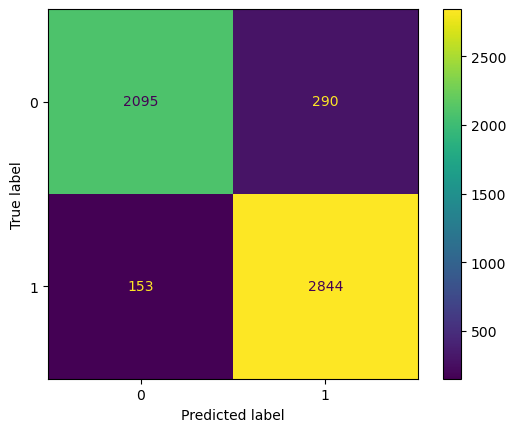

In [78]:
cm = confusion_matrix(ytest, y_pred_prob)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

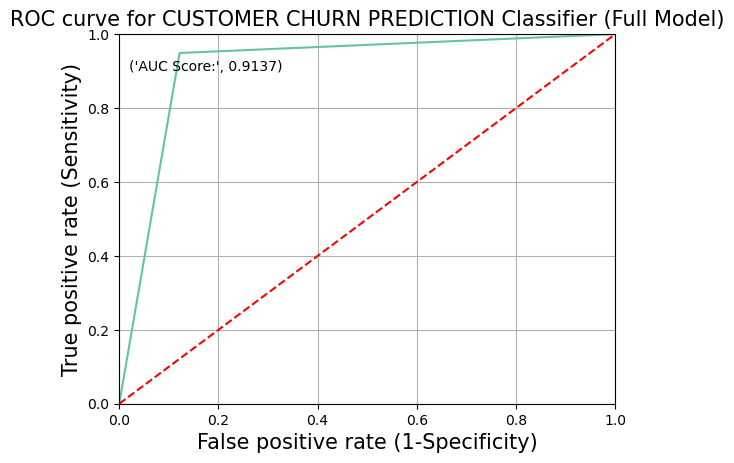

In [79]:
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for CUSTOMER CHURN PREDICTION Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(ytest, y_pred_prob),4)))
plt.grid(True)

In [80]:
metrics.roc_auc_score(ytest,y_pred_prob)

0.9136778287721683

In [81]:
print(classification_report(ytest, y_pred_prob))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      2385
           1       0.91      0.95      0.93      2997

    accuracy                           0.92      5382
   macro avg       0.92      0.91      0.92      5382
weighted avg       0.92      0.92      0.92      5382



## Checking for overfitting

In [82]:
RF_model.fit(Xtrain,Ytrain)
y_pred_train = RF_model.predict(Xtrain)
y_pred_test= RF_model.predict(xtest)
Random_Forest_train_accuracy = accuracy_score(Ytrain,y_pred_train)
Random_Forest_test_accuracy = accuracy_score(ytest,y_pred_test)
print("Random Forest:")
print("Training Accuracy:",Random_Forest_train_accuracy)
print("Test Accuracy:",Random_Forest_test_accuracy)

Random Forest:
Training Accuracy: 0.922651677041717
Test Accuracy: 0.9176885916016351


## Cross-Validation

In [83]:
scores = cross_val_score (RF_model, Xtrain, Ytrain, cv=5)
print("Cross-Validation Scores: ", scores)
print("Mean Cross-Validation Score: ", np.mean (scores))

print('All scores: ', scores)
print("\nMinimum score obtained: ", round (min(scores), 4)) 
print("Maximum score obtained:",    round (max (scores), 4))
print("Average score obtained: ",   round (np.mean (scores), 4))

Cross-Validation Scores:  [0.919647   0.92171893 0.92009292 0.92334495 0.92125436]
Mean Cross-Validation Score:  0.9212116308011995
All scores:  [0.919647   0.92171893 0.92009292 0.92334495 0.92125436]

Minimum score obtained:  0.9196
Maximum score obtained: 0.9233
Average score obtained:  0.9212


# 5.4 AdaBoostClassifier <a id="adaboost_classifier"></a>

In [84]:
from sklearn.ensemble import AdaBoostClassifier

In [85]:
AD = AdaBoostClassifier(n_estimators=300,random_state=10)
AD_model = AD.fit(Xtrain,Ytrain)

In [86]:
y_pred_probb = AD_model.predict(xtest)

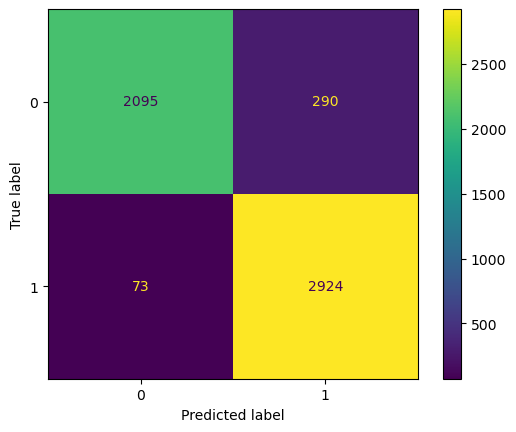

In [87]:
cm = confusion_matrix(ytest, y_pred_probb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

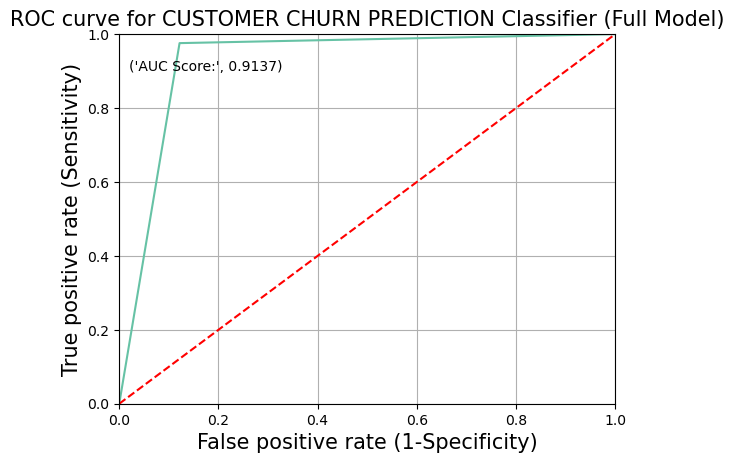

In [88]:
fpr, tpr, thresholds = roc_curve(ytest, y_pred_probb)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for CUSTOMER CHURN PREDICTION Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(ytest, y_pred_prob),4)))
plt.grid(True)

In [89]:
metrics.roc_auc_score(ytest,y_pred_probb)

0.927024508785515

In [90]:
print(classification_report(ytest, y_pred_probb))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      2385
           1       0.91      0.98      0.94      2997

    accuracy                           0.93      5382
   macro avg       0.94      0.93      0.93      5382
weighted avg       0.93      0.93      0.93      5382



## Checking for overfitting

In [91]:
AD_model.fit(Xtrain,Ytrain)
y_pred_train = AD_model.predict(Xtrain)
y_pred_test= AD_model.predict(xtest)
Adaboost_train_accuracy = accuracy_score(Ytrain,y_pred_train)
Adaboost_test_accuracy = accuracy_score(ytest,y_pred_test)
print("Adaboost:")
print("Training Accuracy:",Adaboost_train_accuracy)
print("Test Accuracy:",Adaboost_test_accuracy)

Adaboost:
Training Accuracy: 0.9426275202081205
Test Accuracy: 0.9325529542920847


# Cross-Validation

In [92]:
scores = cross_val_score (AD_model, Xtrain, Ytrain, cv=5)
print("Cross-Validation Scores: ", scores)
print("Mean Cross-Validation Score: ", np.mean (scores))

print('All scores: ', scores)
print("\nMinimum score obtained: ", round (min(scores), 4)) 
print("Maximum score obtained:",    round (max (scores), 4))
print("Average score obtained: ",   round (np.mean (scores), 4))

Cross-Validation Scores:  [0.93241988 0.93542393 0.93890825 0.94262485 0.9398374 ]
Mean Cross-Validation Score:  0.937842860865076
All scores:  [0.93241988 0.93542393 0.93890825 0.94262485 0.9398374 ]

Minimum score obtained:  0.9324
Maximum score obtained: 0.9426
Average score obtained:  0.9378


# 5.5 GradientBoostingClassifier <a id="gradient_boosting_classifier"></a>

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

In [94]:
GD = GradientBoostingClassifier(n_estimators=300,random_state=10)
GD_model = GD.fit(Xtrain,Ytrain)

In [95]:
y_pred_prob = GD_model.predict(xtest)

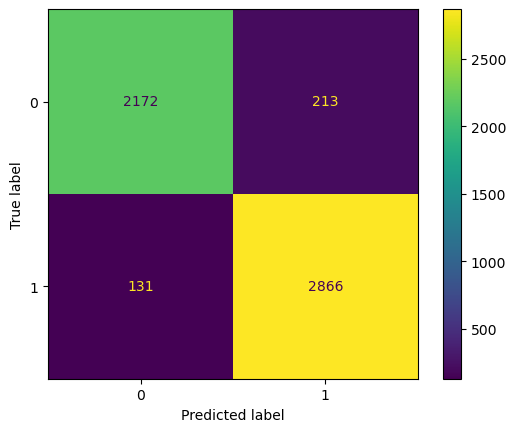

In [96]:
cm = confusion_matrix(ytest,y_pred_prob)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

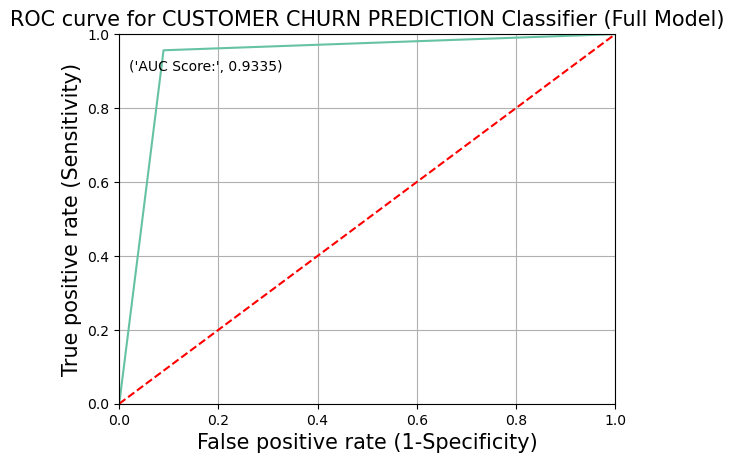

In [97]:
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for CUSTOMER CHURN PREDICTION Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(ytest, y_pred_prob),4)))
plt.grid(True)

In [98]:
metrics.roc_auc_score(ytest,y_pred_prob)

0.9334907234278303

In [99]:
print(classification_report(ytest, y_pred_prob))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2385
           1       0.93      0.96      0.94      2997

    accuracy                           0.94      5382
   macro avg       0.94      0.93      0.94      5382
weighted avg       0.94      0.94      0.94      5382



## Checking for overfitting

In [100]:
GD_model.fit(Xtrain,Ytrain)
y_pred_train = GD_model.predict(Xtrain)
y_pred_test= GD_model.predict(xtest)
GBM_train_accuracy = accuracy_score(Ytrain,y_pred_train)
GBM_test_accuracy = accuracy_score(ytest,y_pred_test)
print('GBM:')
print("Training Accuracy:",GBM_train_accuracy)
print("Test Accuracy:",GBM_test_accuracy)

GBM:
Training Accuracy: 0.9553563132955496
Test Accuracy: 0.9360832404310665


## Cross-Validation

In [101]:
scores = cross_val_score (GD_model, Xtrain, Ytrain, cv=5)
print("Cross-Validation Scores: ", scores)
print("Mean Cross-Validation Score: ", np.mean (scores))

print('All scores: ', scores)
print("\nMinimum score obtained: ", round (min(scores), 4)) 
print("Maximum score obtained:",    round (max (scores), 4))
print("Average score obtained: ",   round (np.mean (scores), 4))

Cross-Validation Scores:  [0.93636786 0.94099884 0.93704994 0.94146341 0.94192799]
Mean Cross-Validation Score:  0.9395616089264204
All scores:  [0.93636786 0.94099884 0.93704994 0.94146341 0.94192799]

Minimum score obtained:  0.9364
Maximum score obtained: 0.9419
Average score obtained:  0.9396


# 5.6 XGBoost <a id="xgboost"></a>

In [102]:
import xgboost as xgb

In [103]:
xgb = xgb.XGBClassifier(random_state=10,gamma=4,learning_rate=0.2,max_depth=4)
XG_model = xgb.fit(Xtrain,Ytrain)

In [104]:
y_pred_prob = XG_model.predict(xtest)

# Model evaluation

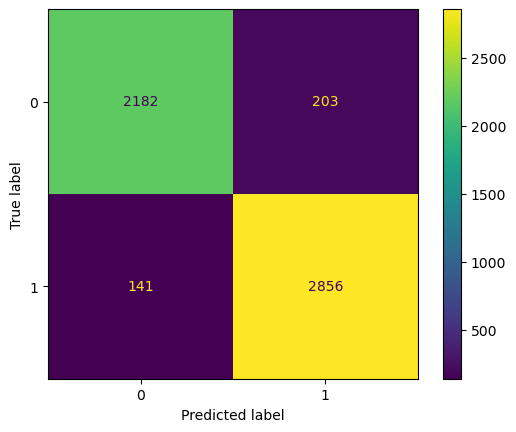

In [105]:
cm = confusion_matrix(ytest,y_pred_prob)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

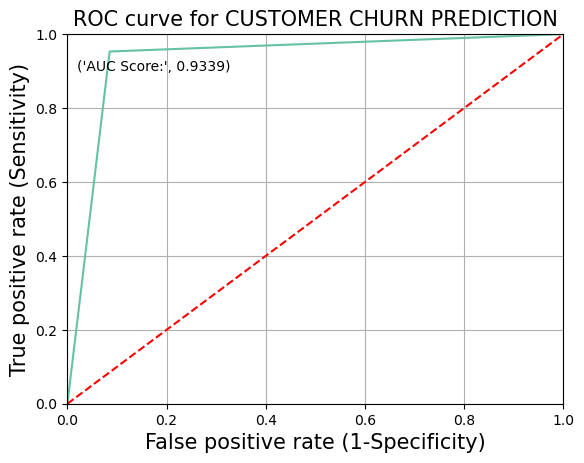

In [106]:
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for CUSTOMER CHURN PREDICTION', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(ytest, y_pred_prob),4)))
plt.grid(True)

In [107]:
metrics.roc_auc_score(ytest,y_pred_prob)

0.9339188244848622

In [108]:
print(classification_report(ytest, y_pred_prob))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2385
           1       0.93      0.95      0.94      2997

    accuracy                           0.94      5382
   macro avg       0.94      0.93      0.94      5382
weighted avg       0.94      0.94      0.94      5382



## Checking for overfitting

In [109]:
XG_model.fit(Xtrain,Ytrain)
y_pred_train = XG_model.predict(Xtrain)
y_pred_test= XG_model.predict(xtest)
XGBoost_train_accuracy = accuracy_score(Ytrain,y_pred_train)
XGBoost_test_accuracy = accuracy_score(ytest,y_pred_test)
print('XGBoost')
print("Training Accuracy:",XGBoost_train_accuracy)
print("Test Accuracy:",XGBoost_test_accuracy)

XGBoost
Training Accuracy: 0.9436959955402768
Test Accuracy: 0.9360832404310665


## Cross-Validation

In [110]:
scores = cross_val_score (XG_model, Xtrain, Ytrain, cv=5)
print("Cross-Validation Scores: ", scores)
print("Mean Cross-Validation Score: ", np.mean (scores))

print('All scores: ', scores)
print("\nMinimum score obtained: ", round (min(scores), 4)) 
print("Maximum score obtained:",    round (max (scores), 4))
print("Average score obtained: ",   round (np.mean (scores), 4))

Cross-Validation Scores:  [0.94101254 0.94332172 0.94146341 0.94425087 0.94518002]
Mean Cross-Validation Score:  0.9430457137031061
All scores:  [0.94101254 0.94332172 0.94146341 0.94425087 0.94518002]

Minimum score obtained:  0.941
Maximum score obtained: 0.9452
Average score obtained:  0.943


## Important Features

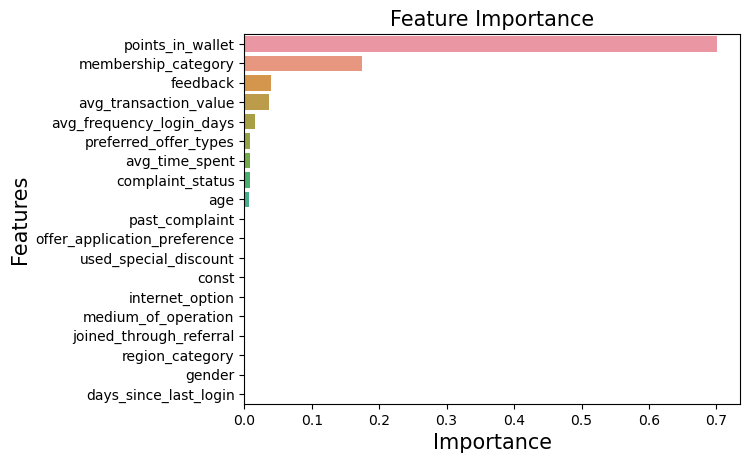

In [111]:
important_features = pd.DataFrame({'Features': Xtrain.columns, 
                                   'Importance': XG_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

## 6. Displaying Score Summary <a id="score_summary"></a>

In [112]:
Model_scores = {'LogisticRegression':{"Train":Logistic_train_accuracy,"Test":Logistic_test_accuracy},
                'Decision Tree':{"Train":Decision_Tree_train_accuracy,"Test":Decision_Tree_test_accuracy},
                'Random Forest':{"Train":Random_Forest_train_accuracy,"Test":Random_Forest_test_accuracy},
                'AdaBoost':{"Train":Adaboost_train_accuracy,"Test":Adaboost_test_accuracy},
                'GBM':{"Train":GBM_train_accuracy,"Test":GBM_test_accuracy},
                'XGBoost':{"Train":XGBoost_train_accuracy,"Test":XGBoost_test_accuracy}}
Score_Summary = pd.DataFrame(Model_scores)

In [113]:
Score_Summary.T

Train      Test
LogisticRegression  0.850924  0.849127
Decision Tree       0.857475  0.849498
Random Forest       0.922652  0.917689
AdaBoost            0.942628  0.932553
GBM                 0.955356  0.936083
XGBoost             0.943696  0.936083

# 7.Conclusion <a id="conclusion"></a>

##### It appears that Gradient Boosting Machines (GBM) and XGBoost perform the best in predicting customer churn based on the dataset.These models demonstrate strong predictive capabilities and generalization to unseen data, indicating their effectiveness in identifying customers likely to churn.

##### In terms of the domain knowledge, these results suggest that the features included in the dataset have a significant impact on predicting customer churn. The strong performance of ensemble methods like AdaBoost, Random Forest, GBM, and XGBoost further implies that the relationship between the provided features and customer churn is complex and may not be linear. Ensemble methods are capable of capturing intricate patterns and interactions within the data, making them well-suited for capturing the nuanced behavior of customers leading to churn.

##### Given the high accuracy achieved by the GBM and XGBoost models, it is recommended to prioritize these models for predicting customer churn in the future. Moreover, these models can be utilized to identify customers who are likely to leave the website, enabling the implementation of targeted retention strategies, such as tailored special offers on membership or personalized communication, aimed at encouraging them to stay and continue using the services provided by the website.